# Business Understanding

1. The Business problem we are trying to address here is to identify female individuals who are highly prone to PCOS. 

    PCOS stands for Polycystic Ovary Syndrome, which is a hormonal disorder that affects women of reproductive age. PCOS is characterized by irregular menstrual cycles, high levels of androgens (male hormones), and the presence of multiple small cysts on the ovaries. The exact cause of PCOS is not known, but it is believed to be related to a combination of genetic and environmental factors. Insulin resistance, which is a condition in which the body's cells do not respond to insulin properly, is also thought to play a role in the development of PCOS.
    
    We are developing a Machine Learning Model to predict the factors causing pcos by implementing various Machine Learning Algorithms.We have also conducted exploratory data analysis using various data visualization techniques.
    
    
2. The data required to identify the problem is Age, no.of aborption, Follicle No., BP, BMI, hair growth, etc to determine the problem solution.

3. Kaggle is the source of data collected from 10 different hospitals from kerala which comprises of numerical and categorical data.

4. We would be performing feature engeneering (Chi Squared & mutual information), exploratory analysis, pair plot of each quantitative attribute with the target, and ultimately predicting the PCOS with help of Decision tree for clasissfication and KNN for clustering.  

# Libraries used in this Assignment


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from scipy.stats import stats
from scipy.stats import chi2_contingency

# 2. Data Acquisition
 

## 2.1 Download link for the data directly



DATA SOURCE : https://www.kaggle.com/datasets/prasoonkottarathil/polycystic-ovary-syndrome-pcos/download?datasetVersionNumber=3

## 2.2 Code for converting the above downloaded data into a dataframe

In [2]:
pcos = pd.read_excel('PCOS_data_without_infertility.xlsx', sheet_name="Full_new")  #importing the data set.

## 2.3 Confirm the data has been downloaded correctly by displaying the first 5 and last 5 records.

In [3]:
pcos.head(5) #first 5 records in the data set

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [4]:
pcos.tail(5) #last 5 records in the data set

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
536,537,537,0,35,50.0,164.592,18.5,17,72,16,...,0.0,0,110,70,1,0,17.5,10.0,6.7,NaN
537,538,538,0,30,63.2,158.000,25.3,15,72,18,...,0.0,0,110,70,9,7,19.0,18.0,8.2,NaN
538,539,539,0,36,54.0,152.000,23.4,13,74,20,...,0.0,0,110,80,1,0,18.0,9.0,7.3,NaN
539,540,540,0,27,50.0,150.000,22.2,15,74,20,...,0.0,0,110,70,7,6,18.0,16.0,11.5,NaN
540,541,541,1,23,82.0,165.000,30.1,13,80,20,...,1.0,0,120,70,9,10,19.0,18.0,6.9,NaN


## 2.4 Display the column headings, statistical information, description and statistical summary of the data.

In [5]:
pcos.columns #column heading

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [6]:
pcos.describe(include='all').transpose() #statistical summary of the data

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Sl. No,541.0,NaN,NaN,NaN,271.0,156.317519,1.0,136.0,271.0,406.0,541.0
Patient File No.,541.0,NaN,NaN,NaN,271.0,156.317519,1.0,136.0,271.0,406.0,541.0
PCOS (Y/N),541.0,NaN,NaN,NaN,0.327172,0.469615,0.0,0.0,0.0,1.0,1.0
Age (yrs),541.0,NaN,NaN,NaN,31.430684,5.411006,20.0,28.0,31.0,35.0,48.0
Weight (Kg),541.0,NaN,NaN,NaN,59.637153,11.028287,31.0,52.0,59.0,65.0,108.0
Height(Cm),541.0,NaN,NaN,NaN,156.484835,6.033545,137.0,152.0,156.0,160.0,180.0
BMI,541.0,NaN,NaN,NaN,24.311285,4.056399,12.417882,21.641274,24.238227,26.634958,38.9
Blood Group,541.0,NaN,NaN,NaN,13.802218,1.840812,11.0,13.0,14.0,15.0,18.0
Pulse rate(bpm),541.0,NaN,NaN,NaN,73.247689,4.430285,13.0,72.0,72.0,74.0,82.0
RR (breaths/min),541.0,NaN,NaN,NaN,19.243993,1.688629,16.0,18.0,18.0,20.0,28.0


In [7]:
pcos.info() #data type of the attributes

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [8]:
pcos.size #total size of the data set

24345

In [9]:
pcos.shape #shape of the dataset (Rows , columns)

(541, 45)

In [10]:
pcos.dtypes

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [11]:
# Select columns with categorical data type
cat_cols = pcos.select_dtypes(include=['object'])

# Select columns with numerical data type
num_cols = pcos.select_dtypes(include=['int64', 'float64'])

# Select columns with boolean data type
bool_cols = pcos.select_dtypes(include=['bool'])

# Print summary of data types
print("Categorical columns:", len(cat_cols.columns))
print("Numerical columns:", len(num_cols.columns))
print("Boolean columns:", len(bool_cols.columns))

Categorical columns: 3
Numerical columns: 42
Boolean columns: 0


In [12]:
pcos.info #shape of the dataset (Row & columns)

<bound method DataFrame.info of      Sl. No  Patient File No.  PCOS (Y/N)   Age (yrs)  Weight (Kg)  \
0         1                 1           0          28         44.6   
1         2                 2           0          36         65.0   
2         3                 3           1          33         68.8   
3         4                 4           0          37         65.0   
4         5                 5           0          25         52.0   
..      ...               ...         ...         ...          ...   
536     537               537           0          35         50.0   
537     538               538           0          30         63.2   
538     539               539           0          36         54.0   
539     540               540           0          27         50.0   
540     541               541           1          23         82.0   

     Height(Cm)         BMI  Blood Group  Pulse rate(bpm)   RR (breaths/min)  \
0        152.000  19.300000           15       

In [13]:
pcos.isnull().sum() #null data

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

Description & Statistical summary from the data 

## 2.5 Observations from the above. 

Size of the dataset
Rows: 541 
Columns: 45
Total Size: 24345

Type of data attributes?

Categorical columns: 3 
Numerical columns: 42

The majority of the attributes in our data set are integers and floats. We can also see some object data types, but based on the data set, we can disregard the entire attribute because it contains no useful information for the analysis.

Is there any null data that has to be cleaned?
Yes, There are 3 null data records needed to be cleaned.
print(df.isnull().sum())   :- to read the number of null data in the dataset.

# 3. Data Preparation

## 3.1 Check for 

* duplicate data
* missing data
* data inconsistencies


In [14]:
pcos.duplicated() #Duplicate Data

0      False
1      False
2      False
3      False
4      False
       ...  
536    False
537    False
538    False
539    False
540    False
Length: 541, dtype: bool

In [15]:
pcos.duplicated().sum() #No Duplicate data found

0

In [16]:
pcos.isna().sum() #missing data

Sl. No                      0
Patient File No.            0
PCOS (Y/N)                  0
 Age (yrs)                  0
Weight (Kg)                 0
Height(Cm)                  0
BMI                         0
Blood Group                 0
Pulse rate(bpm)             0
RR (breaths/min)            0
Hb(g/dl)                    0
Cycle(R/I)                  0
Cycle length(days)          0
Marraige Status (Yrs)       1
Pregnant(Y/N)               0
No. of aborptions           0
  I   beta-HCG(mIU/mL)      0
II    beta-HCG(mIU/mL)      0
FSH(mIU/mL)                 0
LH(mIU/mL)                  0
FSH/LH                      0
Hip(inch)                   0
Waist(inch)                 0
Waist:Hip Ratio             0
TSH (mIU/L)                 0
AMH(ng/mL)                  0
PRL(ng/mL)                  0
Vit D3 (ng/mL)              0
PRG(ng/mL)                  0
RBS(mg/dl)                  0
Weight gain(Y/N)            0
hair growth(Y/N)            0
Skin darkening (Y/N)        0
Hair loss(

In [17]:
(pcos.isna().sum() > 0).values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False,  True,
       False, False, False, False, False, False, False, False,  True])

In [18]:
# drop the unnecessary columns
pcos =pcos.drop(['Sl. No', 'Patient File No.','Weight (Kg)',
       'Height(Cm) ','RR (breaths/min)', 'Cycle(R/I)',
       'Marraige Status (Yrs)','  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)',
       'AMH(ng/mL)', 'PRL(ng/mL)','PRG(ng/mL)', 'RBS(mg/dl)', 'hair growth(Y/N)',
       'BP _Systolic (mmHg)', 'BP _Diastolic (mmHg)', 'Endometrium (mm)','Unnamed: 44','Vit D3 (ng/mL)'],axis=1)

In [19]:
pcos.columns #Updated dataframe (PCOS)

Index(['PCOS (Y/N)', ' Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'Hb(g/dl)', 'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'Weight gain(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')

In [20]:
num_columns=pcos.select_dtypes(exclude='object').columns

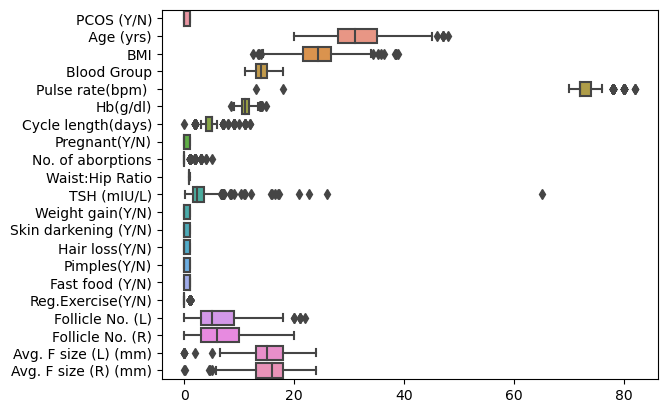

In [21]:
sns.boxplot(data=pcos.filter(num_columns), orient= "h")
plt.show()
plt.close()

## 3.2 Apply techiniques
* to remove duplicate data
* to impute or remove missing data
* to remove data inconsistencies


In [22]:
pcos.duplicated().sum() #no duplicates.

0

In [23]:
mask = pcos.isna().any(axis=1)

In [24]:
indexes=mask.index[mask].tolist()

In [25]:
pcos.drop([156, 458], inplace=True) #removed missing data 

In [26]:
pcos.shape

(539, 21)

In [27]:
pcos.isna().sum() #checking for missing data.

PCOS (Y/N)              0
 Age (yrs)              0
BMI                     0
Blood Group             0
Pulse rate(bpm)         0
Hb(g/dl)                0
Cycle length(days)      0
Pregnant(Y/N)           0
No. of aborptions       0
Waist:Hip Ratio         0
TSH (mIU/L)             0
Weight gain(Y/N)        0
Skin darkening (Y/N)    0
Hair loss(Y/N)          0
Pimples(Y/N)            0
Fast food (Y/N)         0
Reg.Exercise(Y/N)       0
Follicle No. (L)        0
Follicle No. (R)        0
Avg. F size (L) (mm)    0
Avg. F size (R) (mm)    0
dtype: int64

In [28]:
num_columns=pcos.select_dtypes(exclude='object').columns

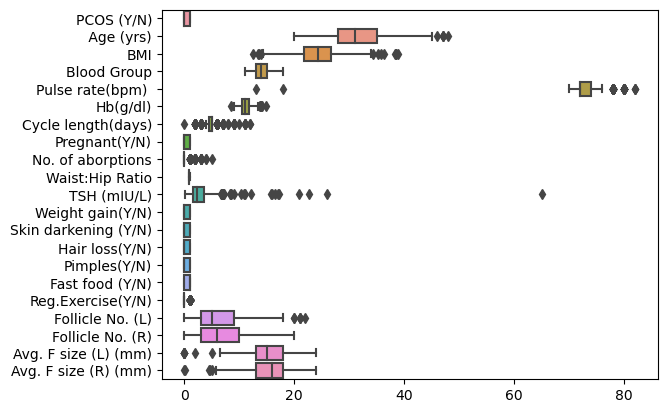

In [29]:
sns.boxplot(data=pcos.filter(num_columns), orient= "h")
plt.show()
plt.close()

In [30]:
pcos.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
PCOS (Y/N),539.0,0.326531,0.469380,0.000000,0.000000,0.000000,1.000000,1.000000
Age (yrs),539.0,31.430427,5.414105,20.000000,28.000000,31.000000,35.000000,48.000000
BMI,539.0,24.315408,4.061713,12.417882,21.674599,24.238227,26.650813,38.900000
Blood Group,539.0,13.801484,1.843182,11.000000,13.000000,14.000000,15.000000,18.000000
Pulse rate(bpm),539.0,73.252319,4.437858,13.000000,72.000000,72.000000,74.000000,82.000000
Hb(g/dl),539.0,11.161558,0.868019,8.500000,10.500000,11.000000,11.750000,14.800000
Cycle length(days),539.0,4.938776,1.491600,0.000000,4.500000,5.000000,5.000000,12.000000
Pregnant(Y/N),539.0,0.382189,0.486374,0.000000,0.000000,0.000000,1.000000,1.000000
No. of aborptions,539.0,0.289425,0.693638,0.000000,0.000000,0.000000,0.000000,5.000000
Waist:Hip Ratio,539.0,0.891841,0.046331,0.755556,0.857143,0.894737,0.928571,0.979167


In [31]:
pcos['PCOS (Y/N)'].value_counts() 
#It is consistent

0    363
1    176
Name: PCOS (Y/N), dtype: int64

In [32]:
pcos[' Age (yrs)'].value_counts()
#It is consistent

28    45
32    44
35    37
30    37
27    34
29    34
31    33
26    32
36    32
34    29
33    25
38    20
25    18
23    18
40    15
24    15
37    15
41     9
39     9
22     8
20     6
42     6
45     4
44     3
21     3
43     3
47     3
48     1
46     1
Name:  Age (yrs), dtype: int64

In [33]:
pcos['BMI'].value_counts()
#It is consistent

26.000000    10
24.000000     8
24.400000     8
23.100000     7
22.400000     6
             ..
19.290123     1
25.631168     1
28.672626     1
28.398718     1
18.500000     1
Name: BMI, Length: 355, dtype: int64

In [34]:
pcos['Blood Group'].value_counts()
#It is consistent

15    205
13    134
11    108
17     42
16     19
14     16
12     13
18      2
Name: Blood Group, dtype: int64

In [35]:
pcos['Pulse rate(bpm) '].value_counts()
#It is consistent

72    271
74    101
78     60
70     45
80     29
73     17
75      7
76      4
82      3
18      1
13      1
Name: Pulse rate(bpm) , dtype: int64

In [36]:
pcos['Hb(g/dl)'].value_counts()
#It is consistent

11.00    61
10.80    60
12.00    43
10.50    43
10.00    40
11.20    36
10.20    35
11.50    35
11.10    22
10.70    21
12.50    17
11.80    13
12.10    12
11.70    11
12.40    11
10.60     9
12.80     7
13.20     7
10.40     7
10.30     5
11.40     4
11.90     4
9.40      3
13.80     3
10.10     2
12.60     2
13.40     2
11.30     2
14.00     2
12.20     2
12.70     2
12.30     2
9.00      1
13.30     1
13.00     1
14.20     1
14.80     1
10.48     1
12.01     1
10.09     1
12.90     1
8.50      1
11.60     1
9.50      1
10.90     1
9.80      1
Name: Hb(g/dl), dtype: int64

In [37]:
pcos['Cycle length(days)'].value_counts()
#It is consistent

5     276
6      91
4      60
2      38
3      36
7      18
9       9
11      5
8       2
12      2
0       1
10      1
Name: Cycle length(days), dtype: int64

In [38]:
pcos['Pregnant(Y/N)'].value_counts()
#It is consistent

0    333
1    206
Name: Pregnant(Y/N), dtype: int64

In [39]:
pcos['No. of aborptions'].value_counts()
#It is consistent

0    435
1     69
2     22
3     10
4      2
5      1
Name: No. of aborptions, dtype: int64

In [40]:
pcos['Waist:Hip Ratio'].value_counts()
#It is consistent

0.888889    29
0.921053    28
0.894737    27
0.842105    20
0.857143    19
            ..
0.794872     1
0.761905     1
0.795000     1
0.782000     1
0.755556     1
Name: Waist:Hip Ratio, Length: 95, dtype: int64

In [41]:
pcos['TSH (mIU/L)'].value_counts()
#It is consistent

5.000    18
1.000     9
1.510     7
2.000     5
1.400     5
         ..
2.490     1
1.361     1
3.160     1
2.740     1
2.500     1
Name: TSH (mIU/L), Length: 308, dtype: int64

In [42]:
pcos['Weight gain(Y/N)'].value_counts()
#It is consistent

0    335
1    204
Name: Weight gain(Y/N), dtype: int64

In [43]:
pcos['Skin darkening (Y/N)'].value_counts()
#It is consistent

0    374
1    165
Name: Skin darkening (Y/N), dtype: int64

In [44]:
pcos['Hair loss(Y/N)'].value_counts()
#It is consistent

0    295
1    244
Name: Hair loss(Y/N), dtype: int64

In [45]:
pcos['Pimples(Y/N)'].value_counts()
#It is consistent

0    274
1    265
Name: Pimples(Y/N), dtype: int64

In [46]:
pcos['Fast food (Y/N)'].value_counts()
#It is consistent

1.0    278
0.0    261
Name: Fast food (Y/N), dtype: int64

In [47]:
pcos['Reg.Exercise(Y/N)'].value_counts()
#It is consistent

0    406
1    133
Name: Reg.Exercise(Y/N), dtype: int64

In [48]:
pcos['Follicle No. (L)'].value_counts()
#It is consistent

3     61
1     59
6     54
4     53
5     51
2     42
7     38
8     35
9     27
10    26
12    23
11    17
14    12
0     10
13     9
16     6
15     6
18     4
21     3
20     2
22     1
Name: Follicle No. (L), dtype: int64

In [49]:
pcos['Follicle No. (R)'].value_counts()
#It is consistent

5     56
7     54
2     54
3     49
4     46
1     41
10    40
6     36
12    30
9     29
8     23
11    18
15    13
0     11
14    10
13     7
16     7
20     6
18     5
19     4
Name: Follicle No. (R), dtype: int64

In [50]:
pcos['Avg. F size (L) (mm)'].value_counts()
#It is consistent

15.0    76
18.0    69
14.0    60
16.0    52
17.0    47
19.0    47
13.0    38
12.0    31
10.0    28
11.0    25
20.0    21
0.0      7
21.0     7
8.0      5
9.5      3
17.5     3
10.5     2
9.0      2
7.0      2
22.0     2
18.5     2
2.0      1
12.5     1
24.0     1
14.5     1
15.5     1
7.5      1
11.5     1
5.0      1
6.5      1
6.8      1
Name: Avg. F size (L) (mm), dtype: int64

In [51]:
pcos['Avg. F size (R) (mm)'].value_counts()
#It is consistent

18.00    84
15.00    61
17.00    57
14.00    52
16.00    50
19.00    50
12.00    44
13.00    38
20.00    26
11.00    25
10.00    11
21.00    10
9.00      6
7.00      3
6.00      2
22.00     2
8.50      2
17.50     2
16.50     1
0.17      1
24.00     1
0.00      1
11.50     1
4.70      1
10.50     1
5.80      1
6.20      1
4.50      1
5.00      1
13.50     1
8.00      1
23.00     1
Name: Avg. F size (R) (mm), dtype: int64

In [52]:
iqr =pcos.describe(percentiles=[0.25, 0.75]).loc['75%'].subtract(pcos.describe(percentiles=[0.25, 0.75]).loc['25%'])
print(iqr)

PCOS (Y/N)              1.000000
 Age (yrs)              7.000000
BMI                     4.976214
Blood Group             2.000000
Pulse rate(bpm)         2.000000
Hb(g/dl)                1.250000
Cycle length(days)      0.500000
Pregnant(Y/N)           1.000000
No. of aborptions       0.000000
Waist:Hip Ratio         0.071429
TSH (mIU/L)             2.090000
Weight gain(Y/N)        1.000000
Skin darkening (Y/N)    1.000000
Hair loss(Y/N)          1.000000
Pimples(Y/N)            1.000000
Fast food (Y/N)         1.000000
Reg.Exercise(Y/N)       0.000000
Follicle No. (L)        6.000000
Follicle No. (R)        7.000000
Avg. F size (L) (mm)    5.000000
Avg. F size (R) (mm)    5.000000
dtype: float64


## 3.3 Encode categorical data

Categorical data in our data set is already encoded so we'll ignore this part.

## 3.4 Report

Duplicate Data:
    There is no duplicate data in the data set so ignoring this part.
Missing Data:
    Indexes 156, 458 had missing data, they're missing completely at random (MCAR), and it very minimal and satisfied the conditon to remove the data from the data set. So we removed the indexes completely.
Data inconsistencies:
    The data set is consistent throughout, so we ignored this part.

## 3.5 Identify the target variables.

In [53]:

#The target variable is the 'PCOS (Y/N)' column, which indicates whether the patient is affected by PCOS or not..

# Select the columns to use as features
X = pcos.drop('PCOS (Y/N)', axis=1)

# Select the column to use as the target variable
y = pcos['PCOS (Y/N)']

print(X.columns)


Index([' Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ', 'Hb(g/dl)',
       'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'Weight gain(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')


our target variable is pcos, but it is already encoded so we'll move on to data visualization.

# 4. Data Exploration using various plots



## 4.1 Scatter plot of each quantitative attribute with the target.

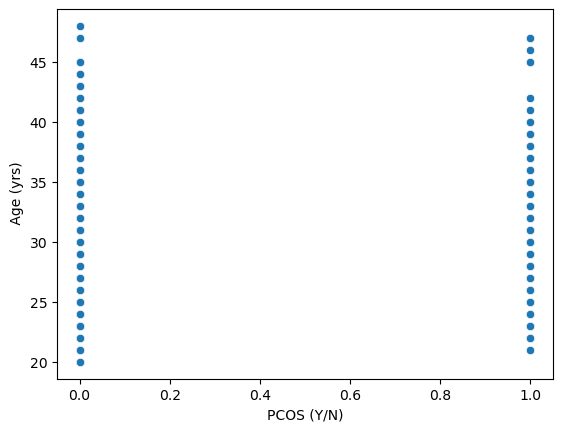

In [54]:
sns.scatterplot(x='PCOS (Y/N)', y=' Age (yrs)', data=pcos)
plt.show()
plt.close()

We have two cases, one with pcos and one without pcos, a scatter plot cannot provide enough information for this analysis, so we are plotting a relationship matrix, which clearly shows the relationship between the attributes.

Text(0.5, 0, 'PCOS (Y/N)')

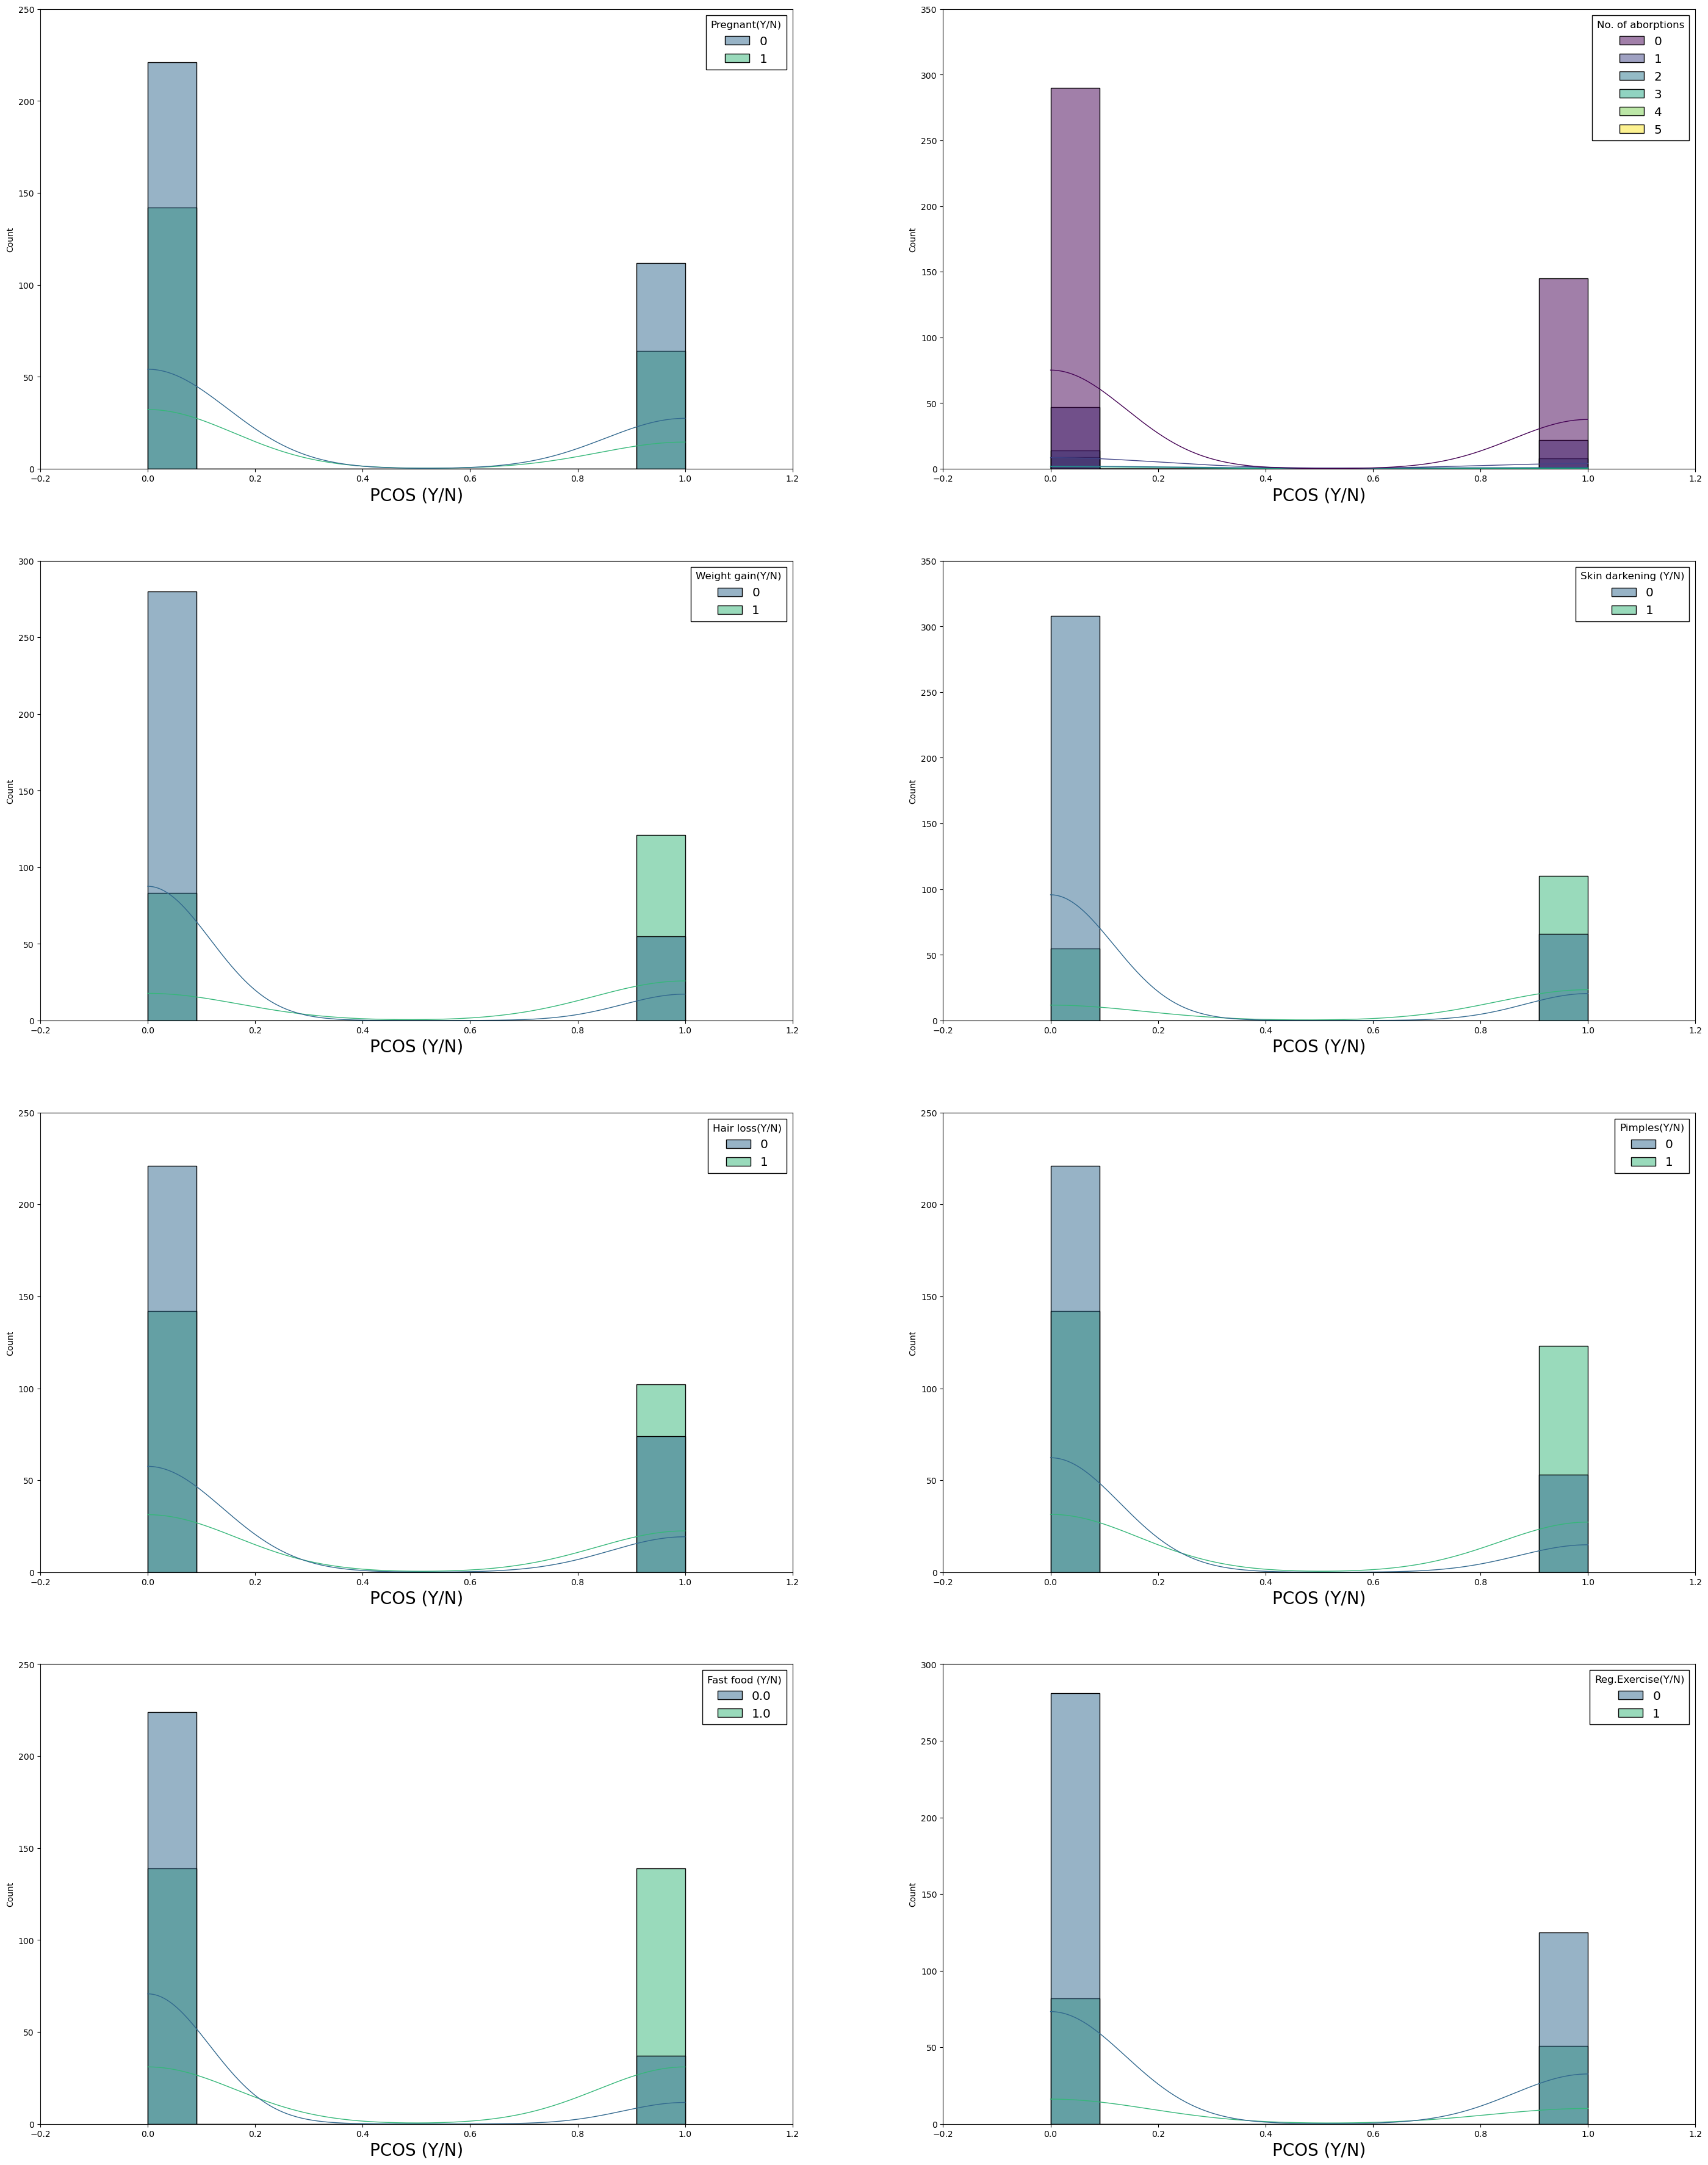

In [55]:
fig, ax = plt.subplots(4,2, figsize=(35,45))
plt.style.use("classic")

sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['Pregnant(Y/N)'], palette="viridis", kde=True, ax=ax[0,0])
ax[0,0].set_xlabel('PCOS (Y/N)',fontsize=20)
sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['No. of aborptions'], palette="viridis", kde=True, ax=ax[0,1])
ax[0,1].set_xlabel('PCOS (Y/N)',fontsize=20)
sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['Weight gain(Y/N)'], palette="viridis", kde=True, ax=ax[1,0])
ax[1,0].set_xlabel('PCOS (Y/N)',fontsize=20)
sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['Skin darkening (Y/N)'], palette="viridis", kde=True, ax=ax[1,1])
ax[1,1].set_xlabel('PCOS (Y/N)',fontsize=20)
sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['Hair loss(Y/N)'], palette="viridis", kde=True, ax=ax[2,0])
ax[2,0].set_xlabel('PCOS (Y/N)',fontsize=20)
sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['Pimples(Y/N)'], palette="viridis", kde=True, ax=ax[2,1])
ax[2,1].set_xlabel('PCOS (Y/N)',fontsize=20)
sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['Fast food (Y/N)'], palette="viridis", kde=True, ax=ax[3,0])
ax[3,0].set_xlabel('PCOS (Y/N)',fontsize=20)
sns.histplot(x = pcos['PCOS (Y/N)'], hue = pcos['Reg.Exercise(Y/N)'], palette="viridis", kde=True, ax=ax[3,1])
ax[3,1].set_xlabel('PCOS (Y/N)',fontsize=20)

In [56]:
pcos.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'Hb(g/dl)', 'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'Weight gain(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')

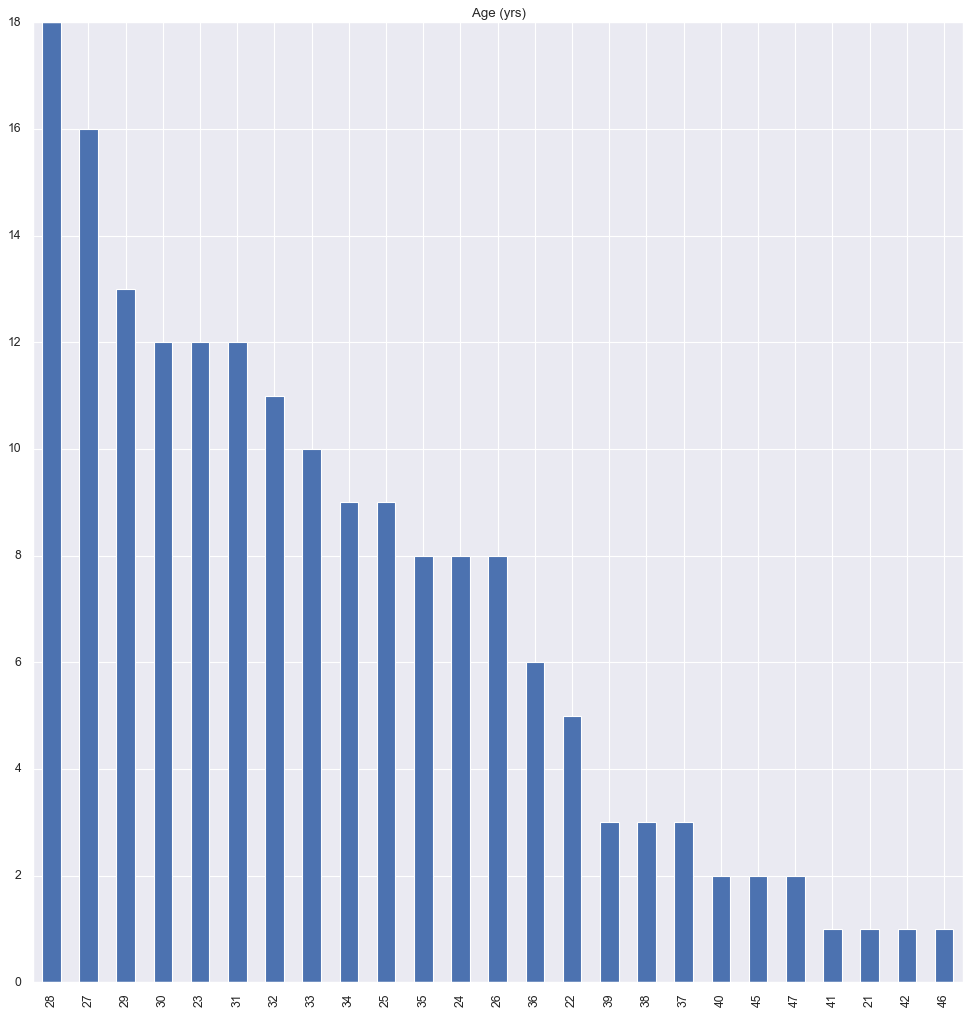

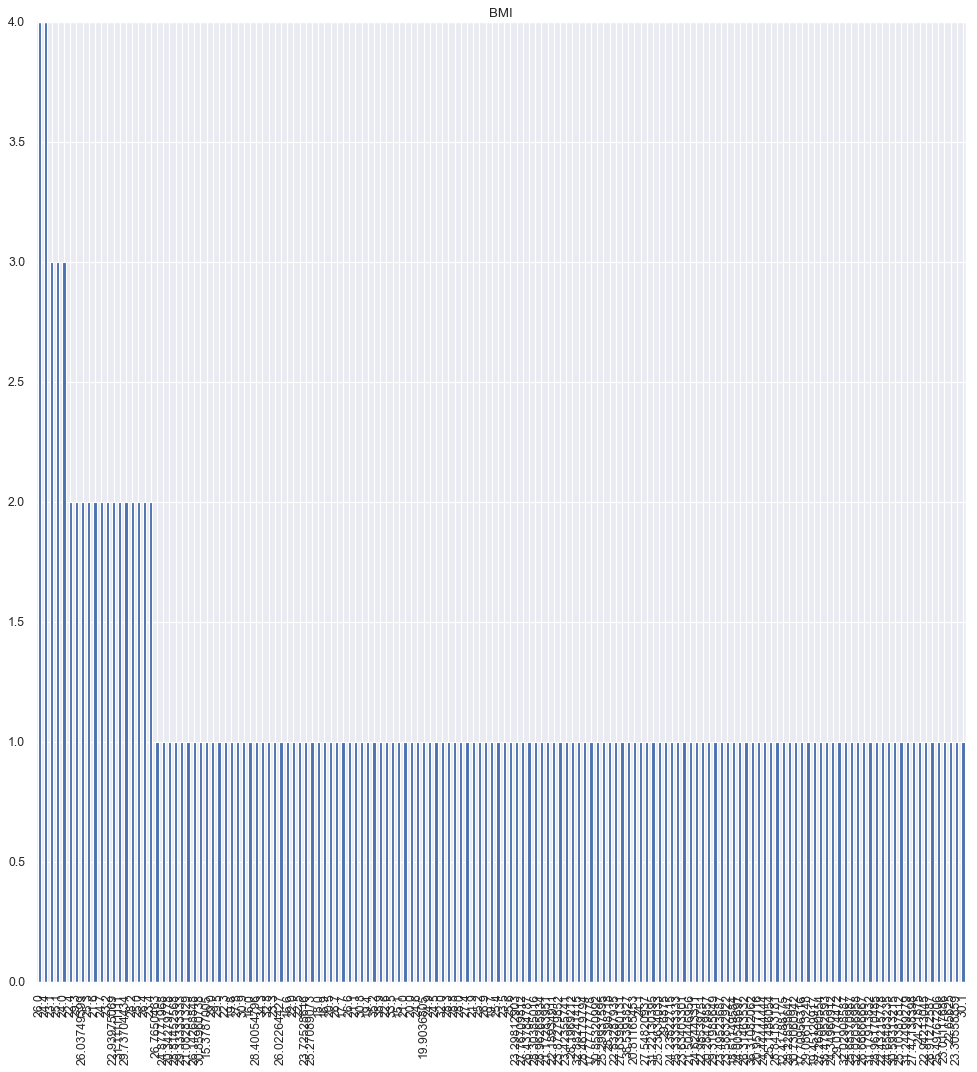

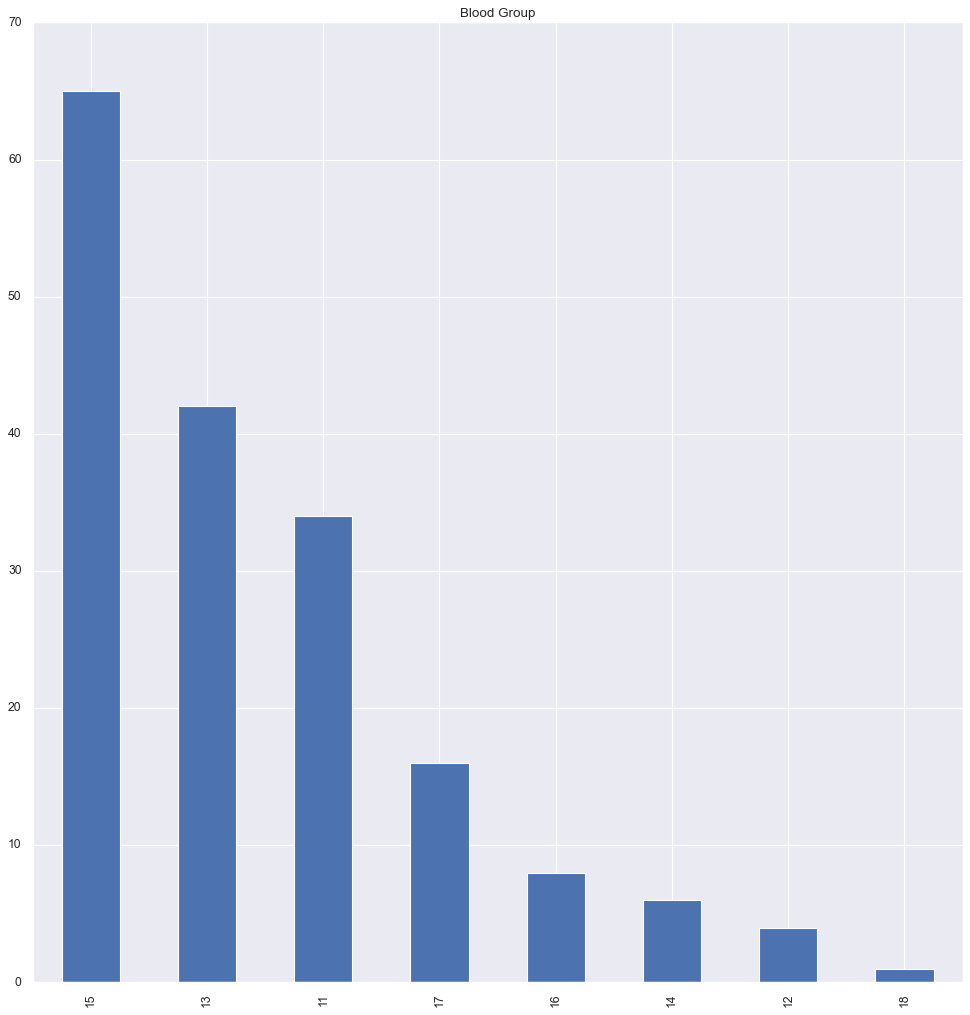

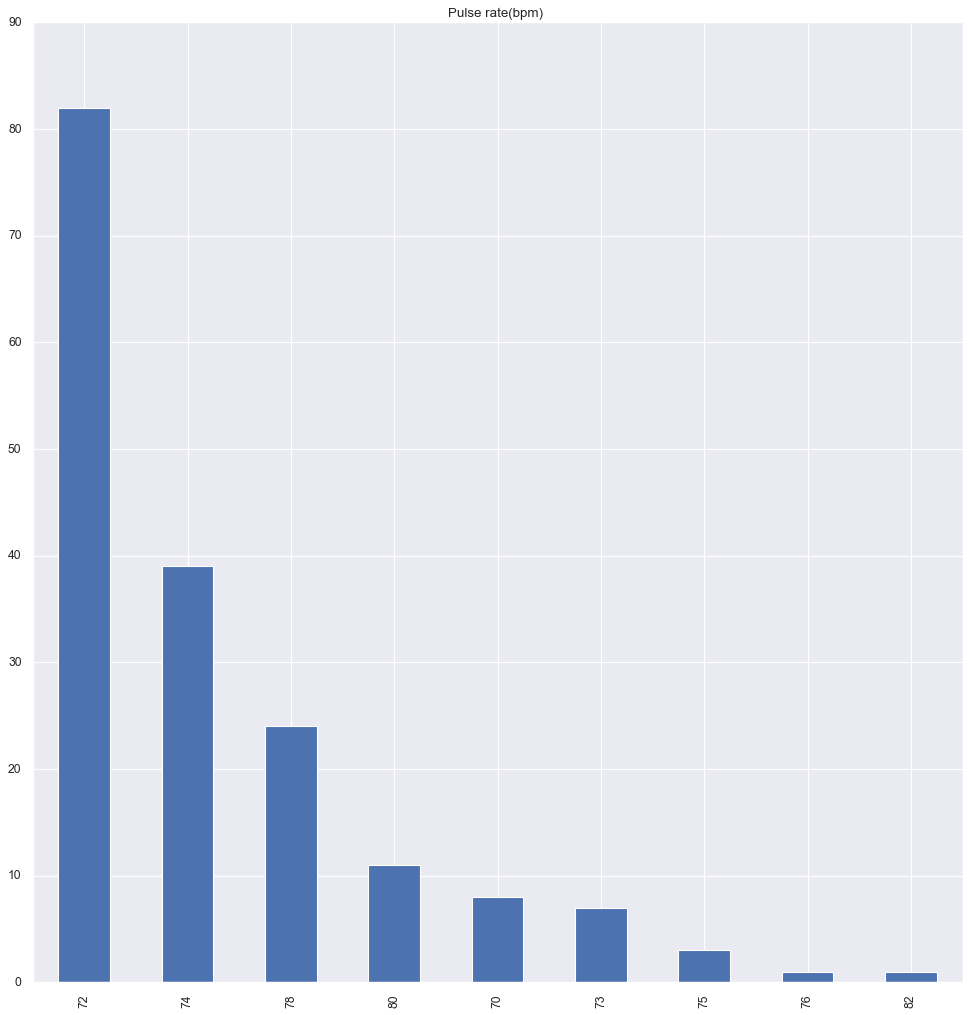

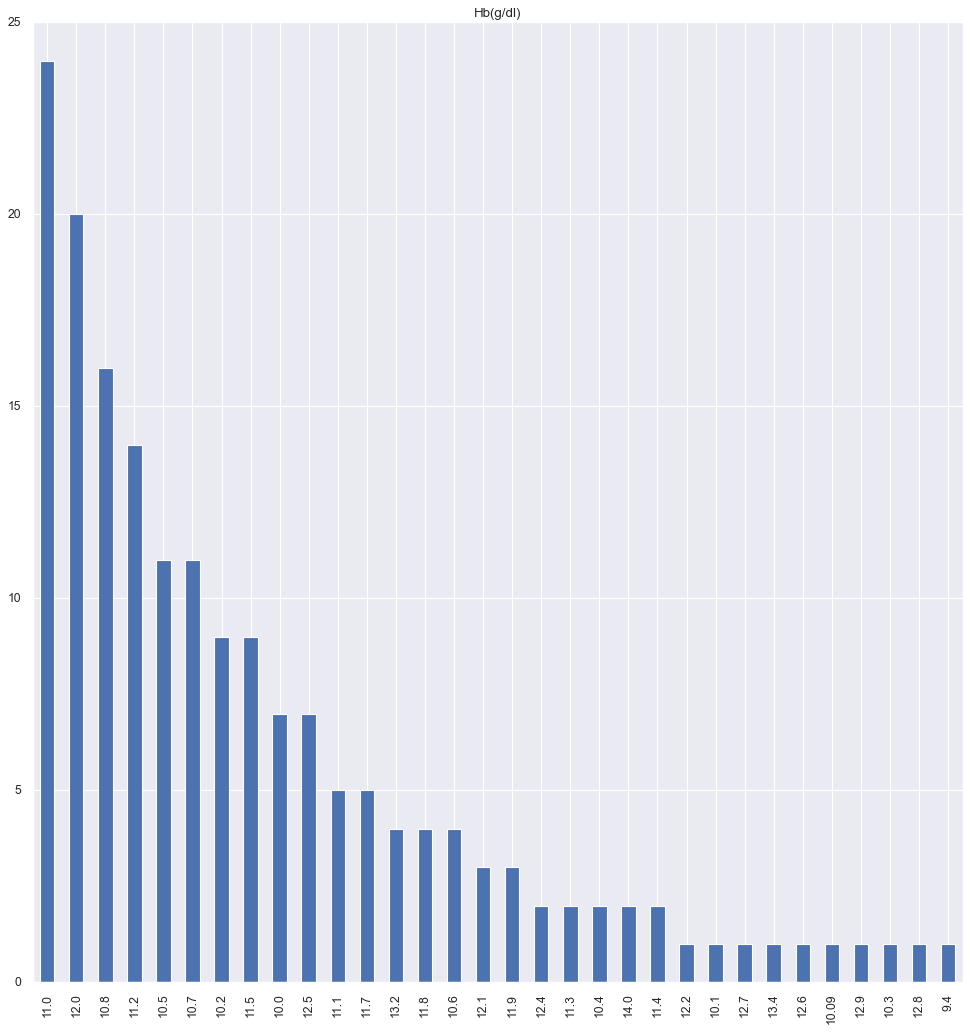

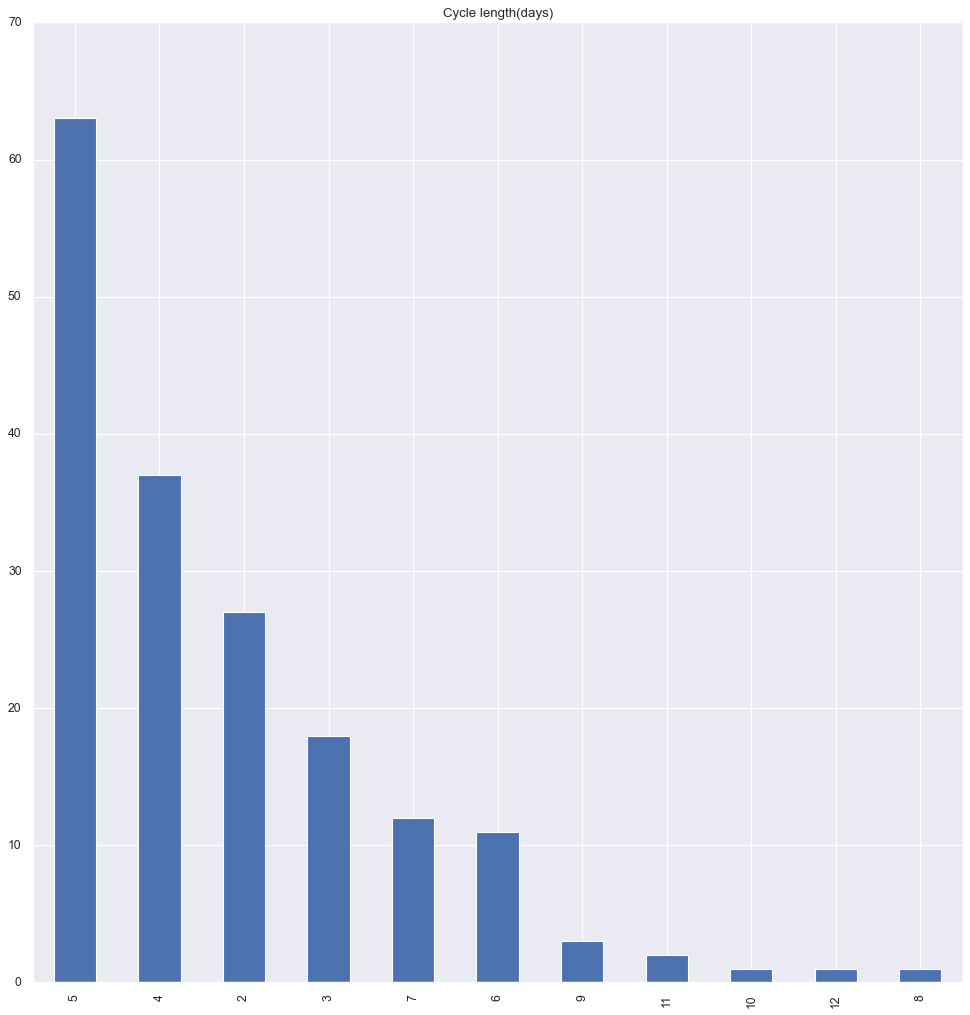

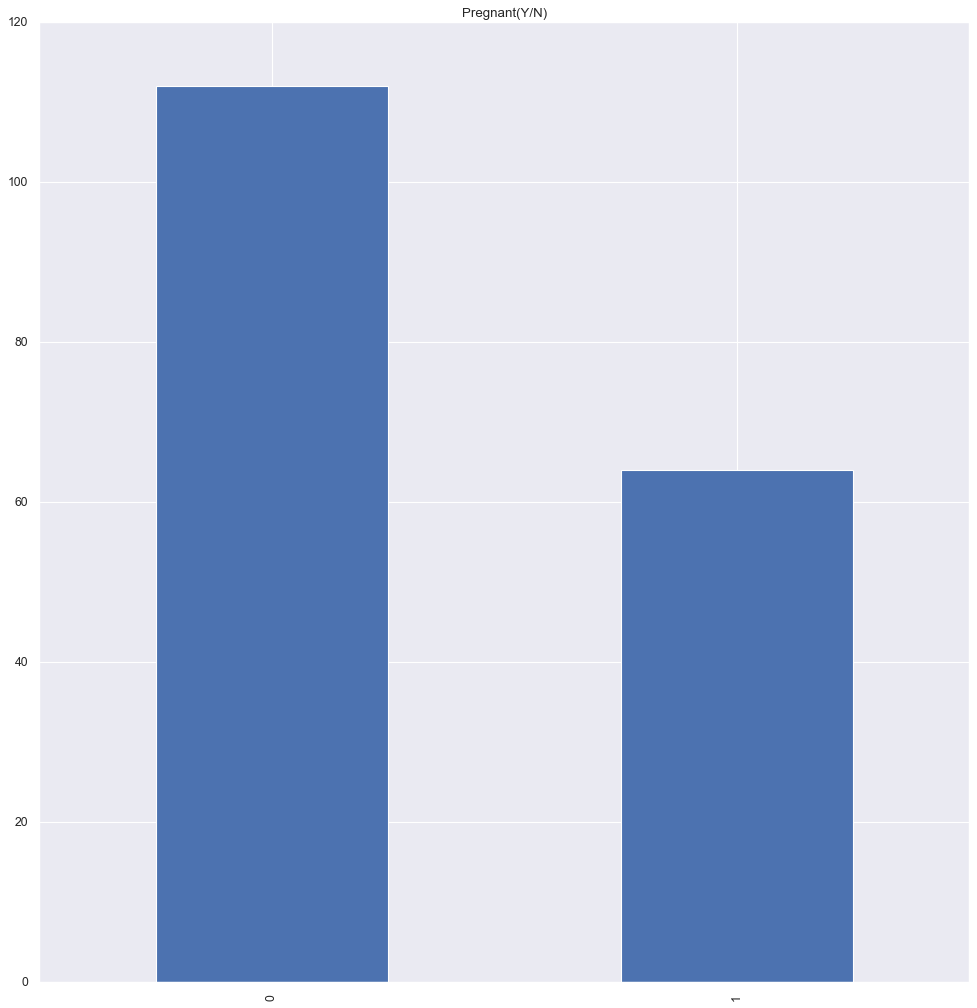

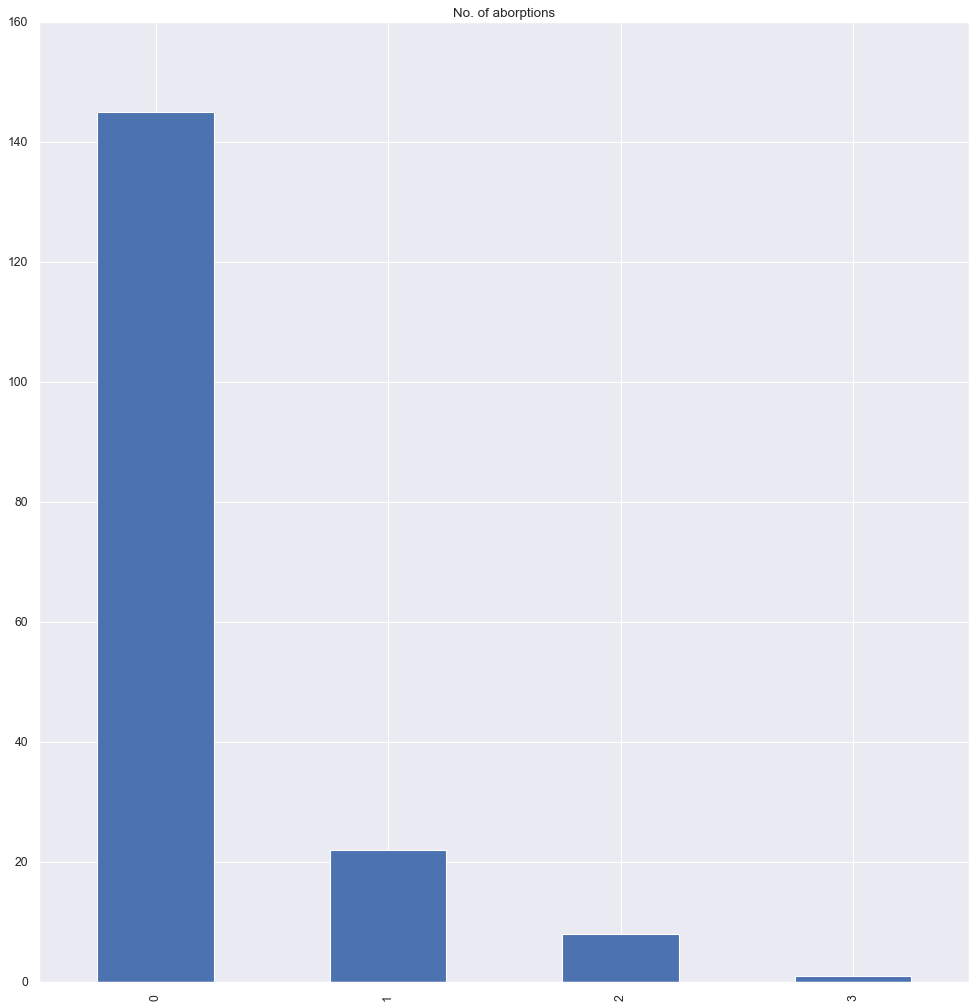

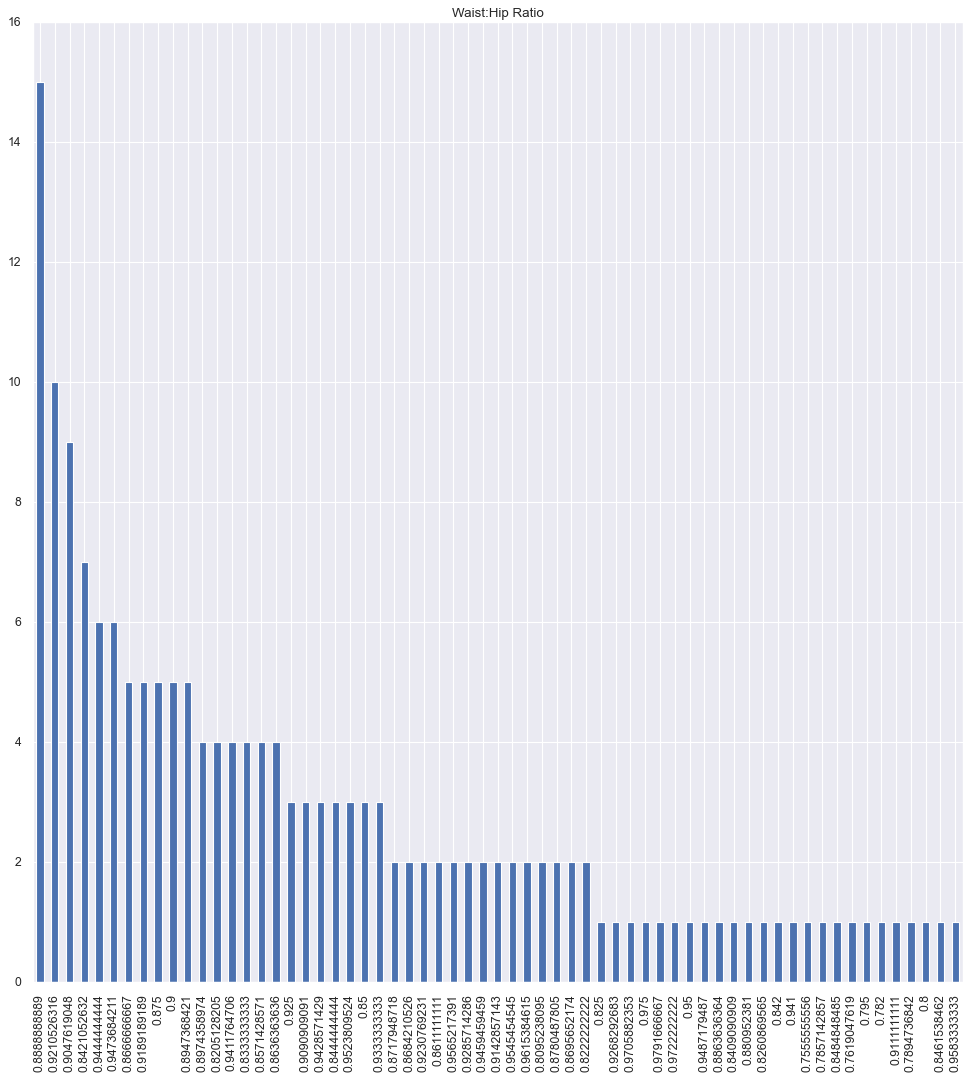

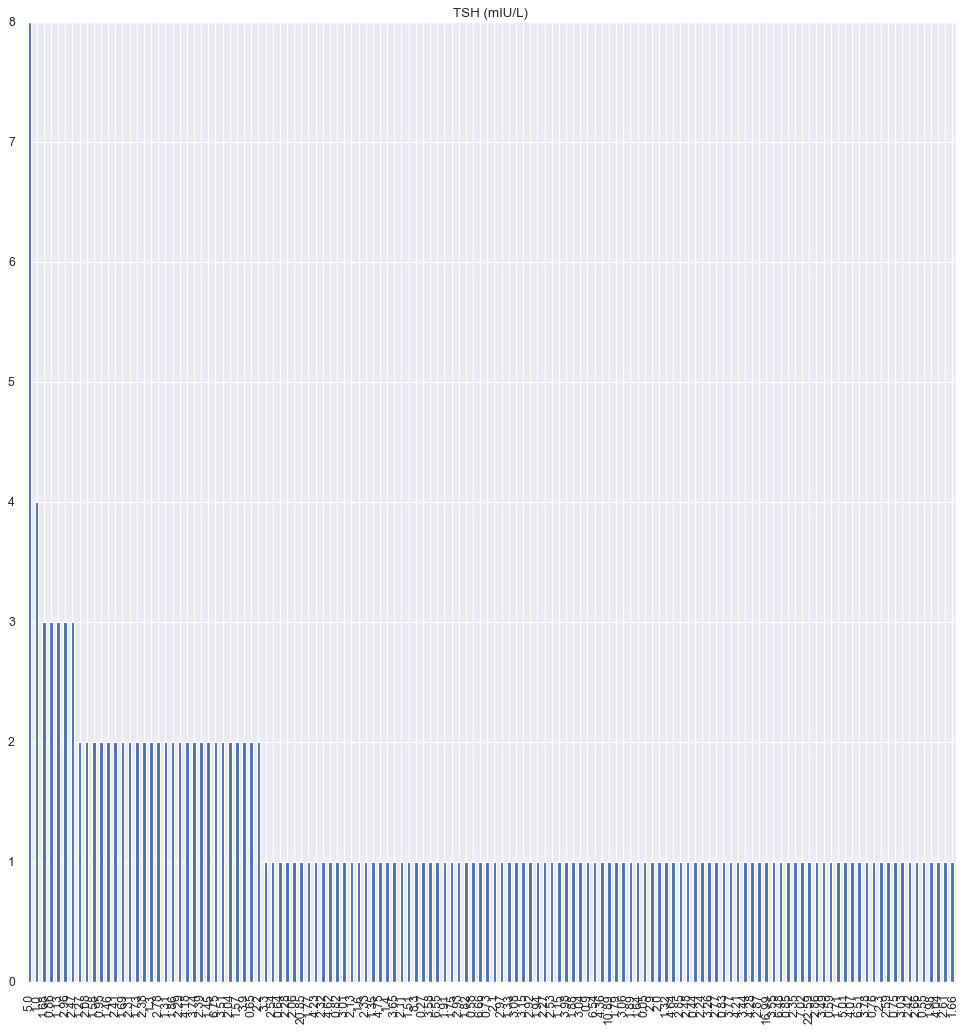

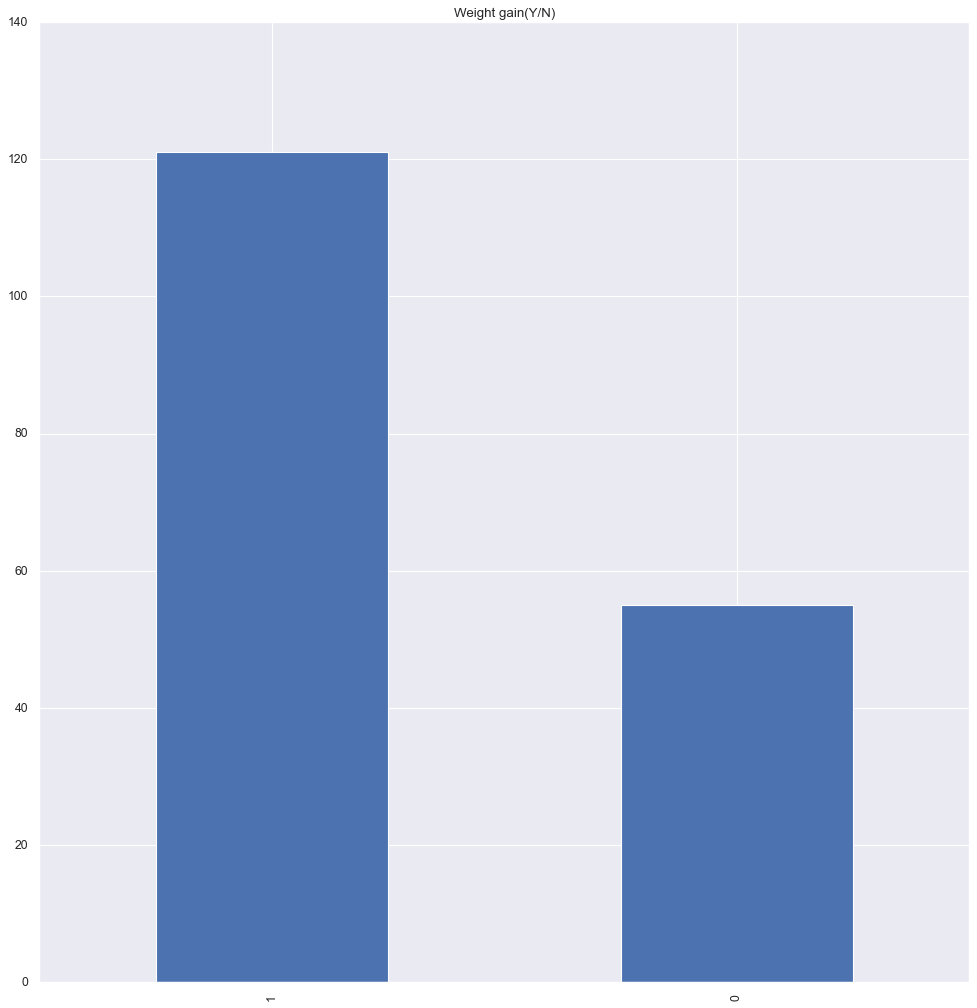

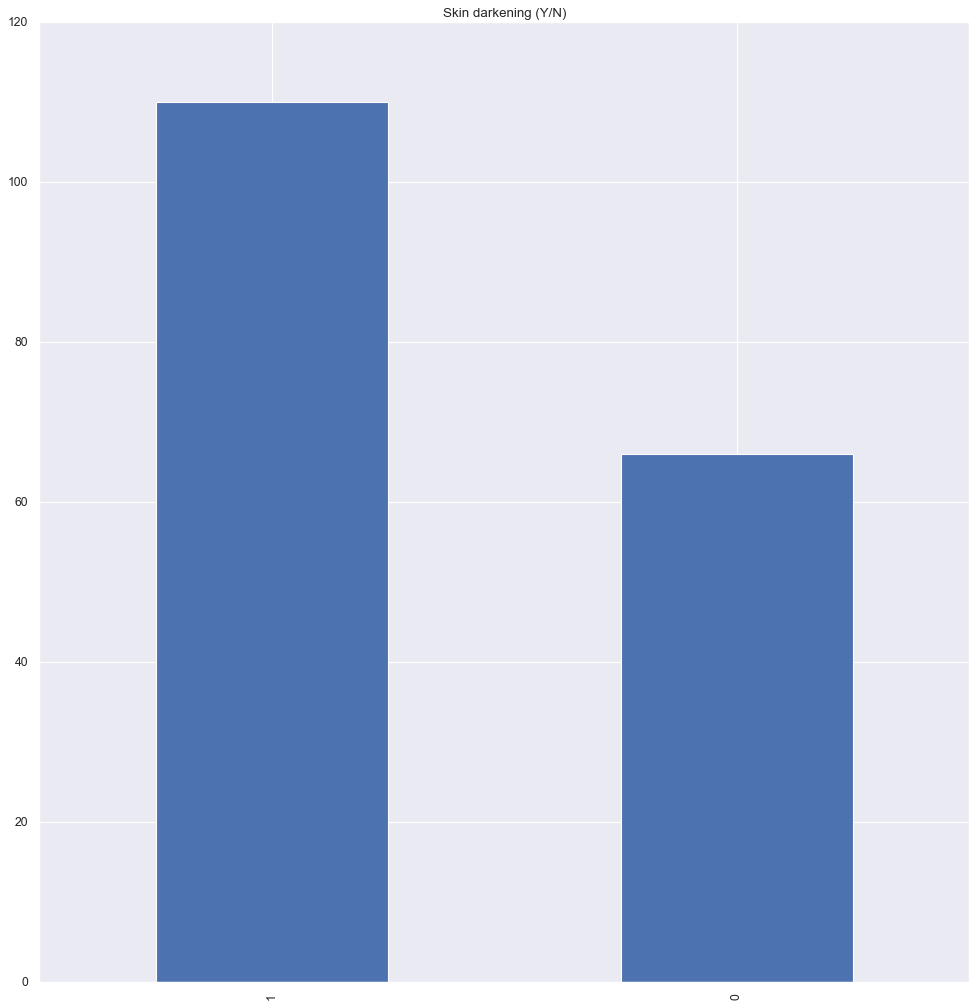

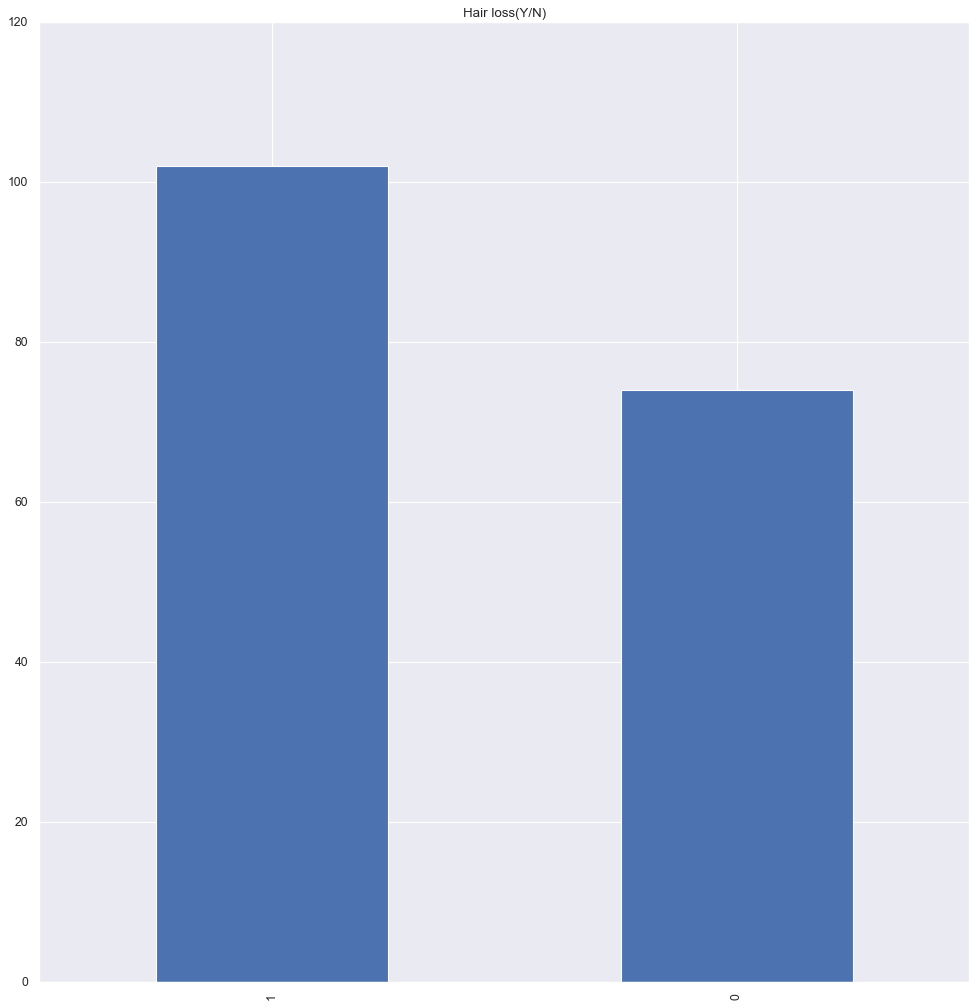

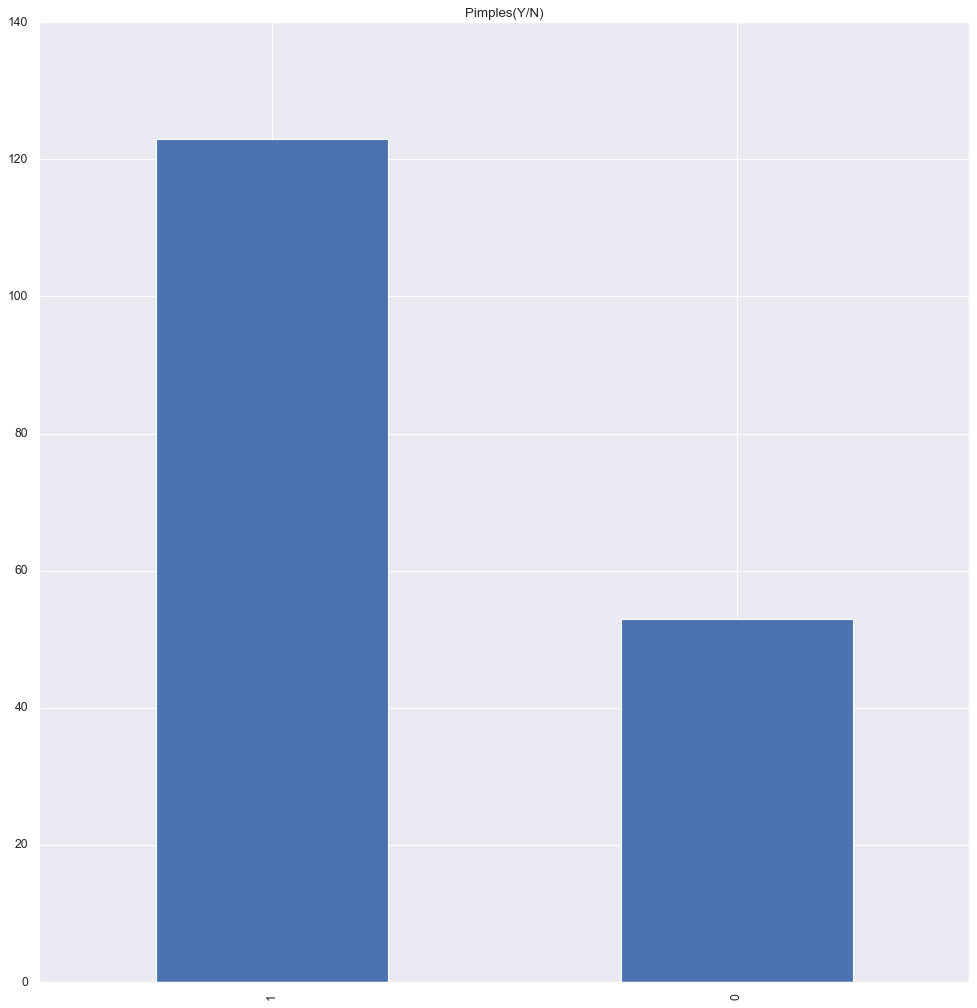

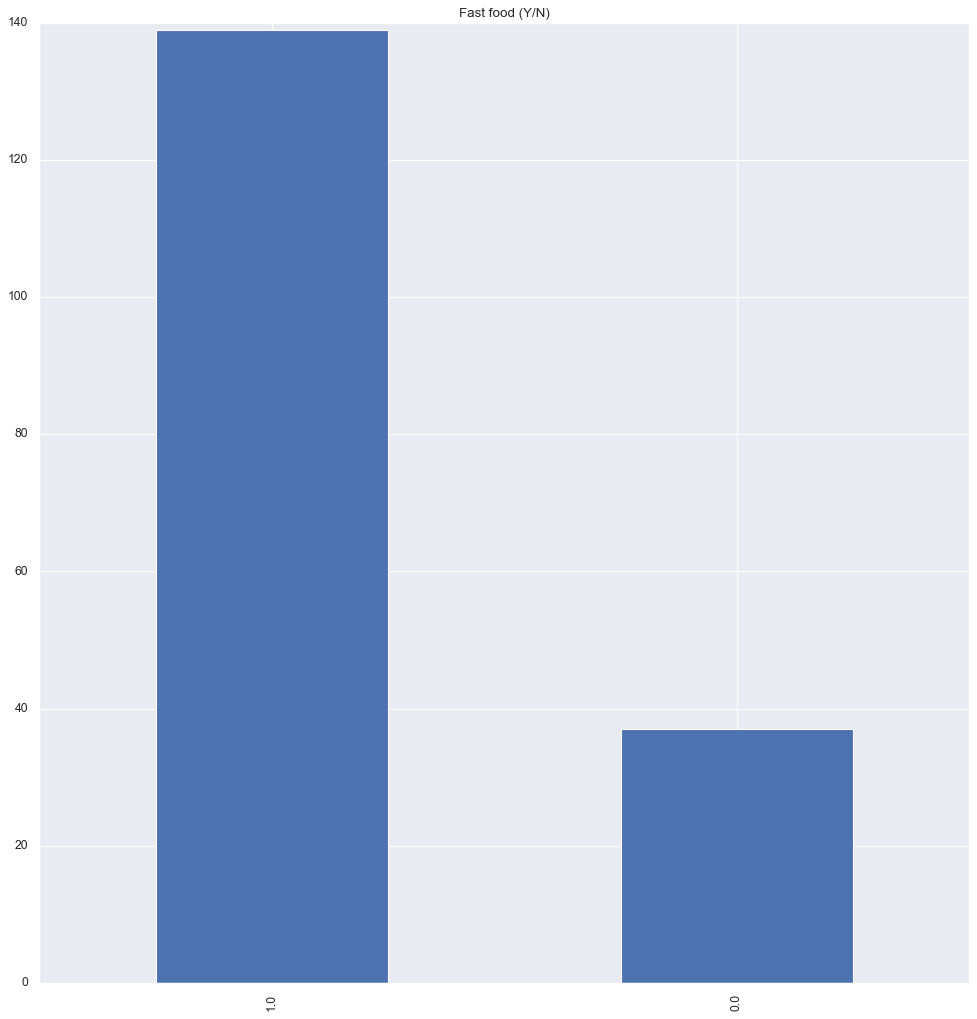

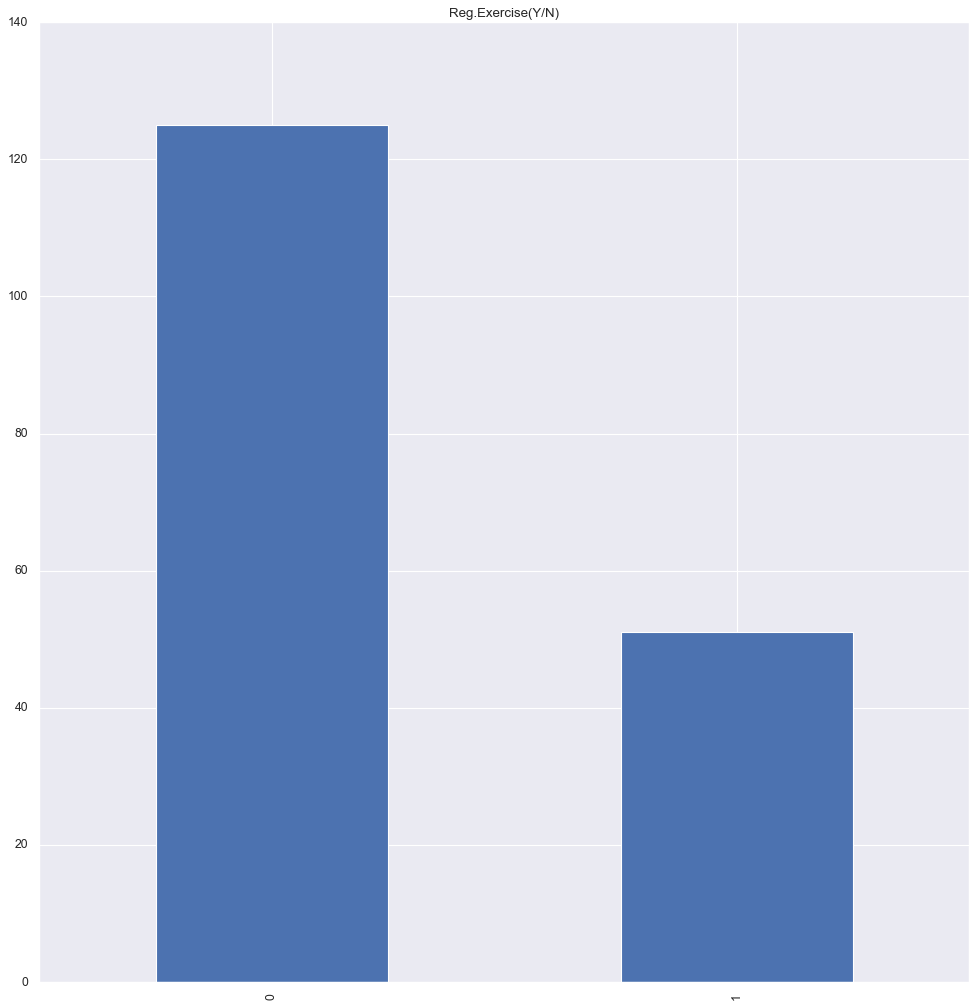

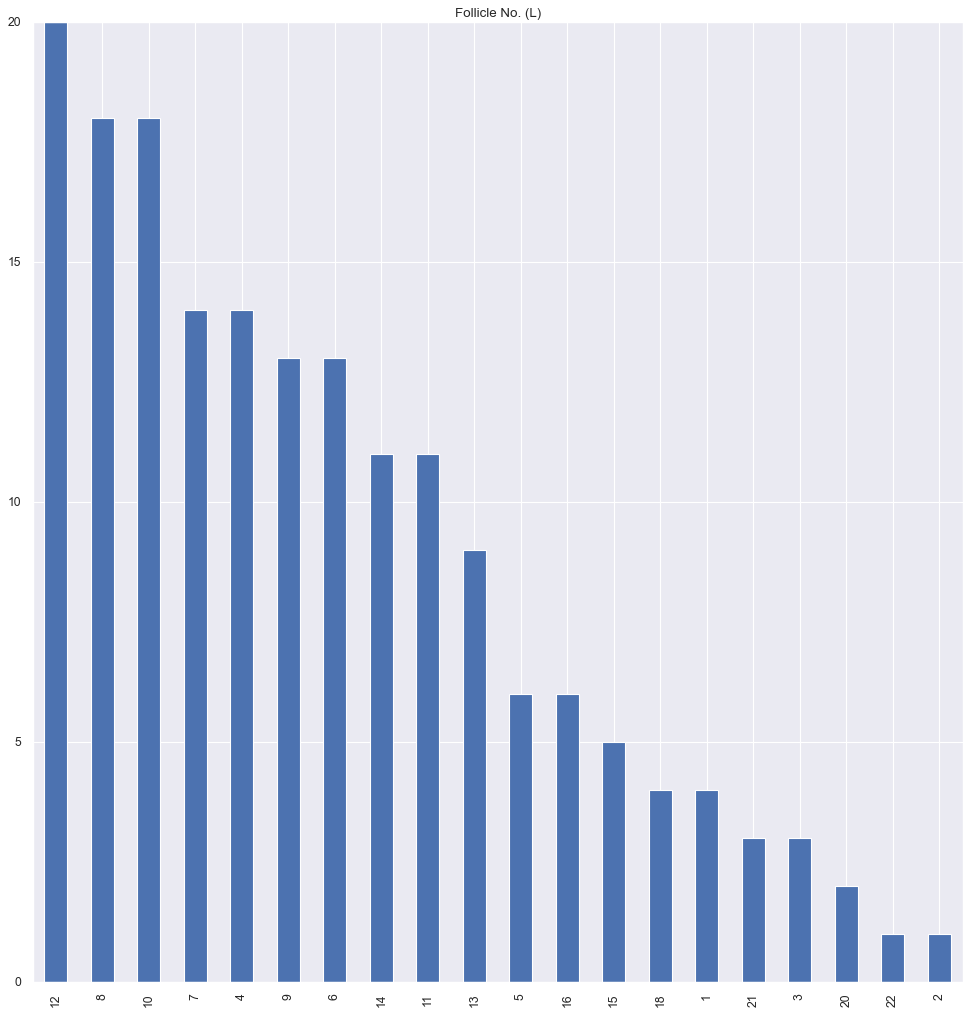

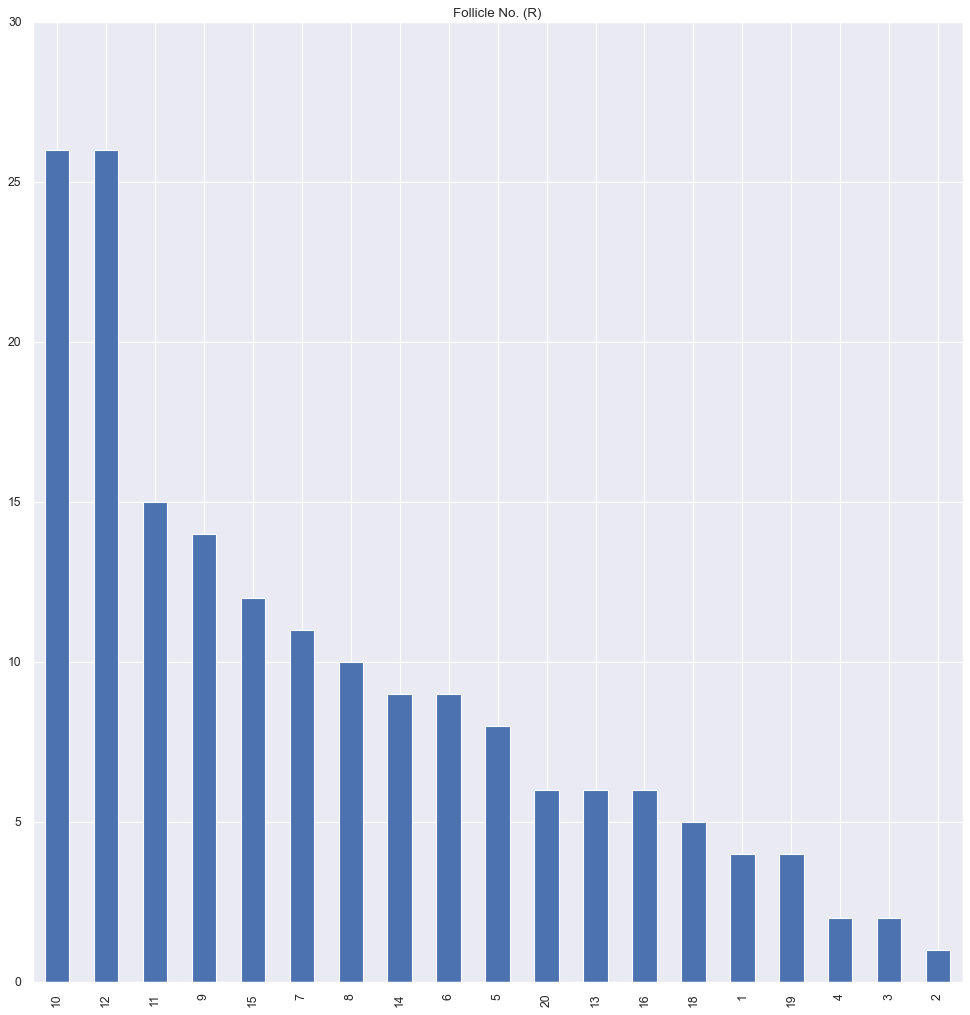

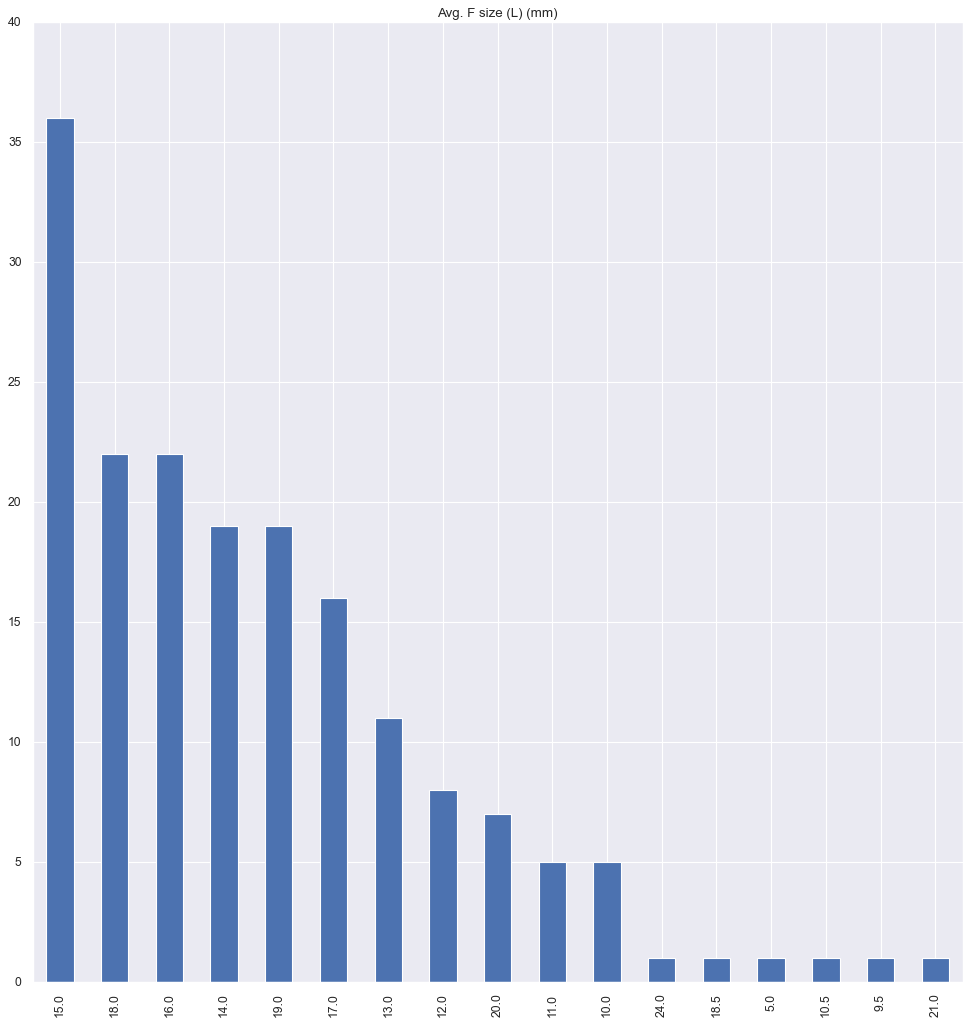

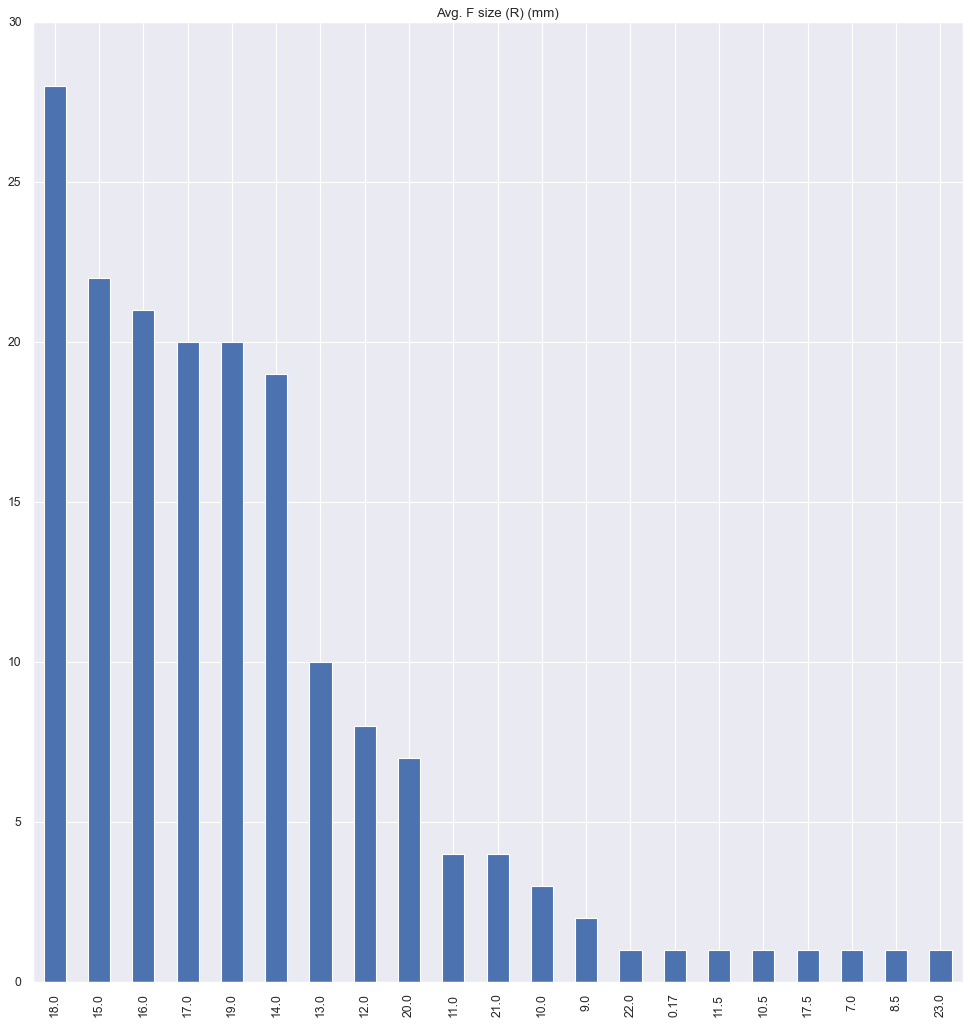

In [57]:
for i in [' Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'Hb(g/dl)', 'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'Weight gain(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)']:
  sns.set(rc = {'figure.figsize':(15,15)})
  pcos[pcos['PCOS (Y/N)'] == 1][i].value_counts().plot.bar()
  plt.title(i)
  plt.show()

## 4.2 EDA using visuals

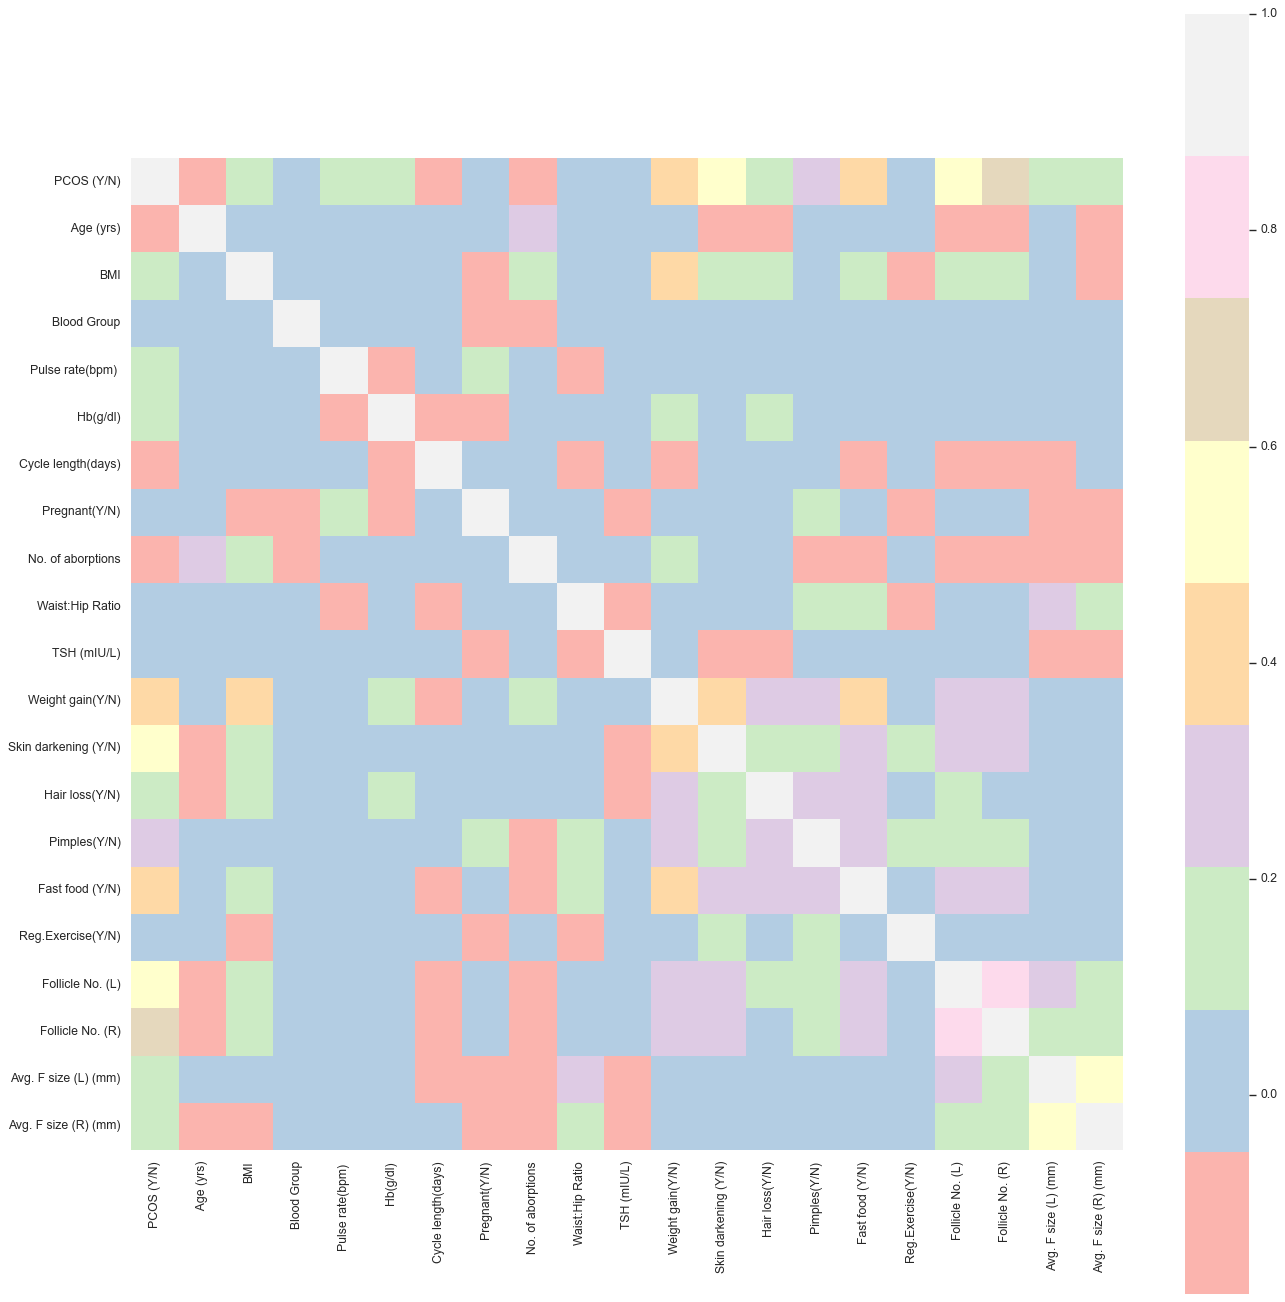

In [58]:
#correlation plot.

corrmat = pcos.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(corrmat,cmap="Pastel1", square=True);

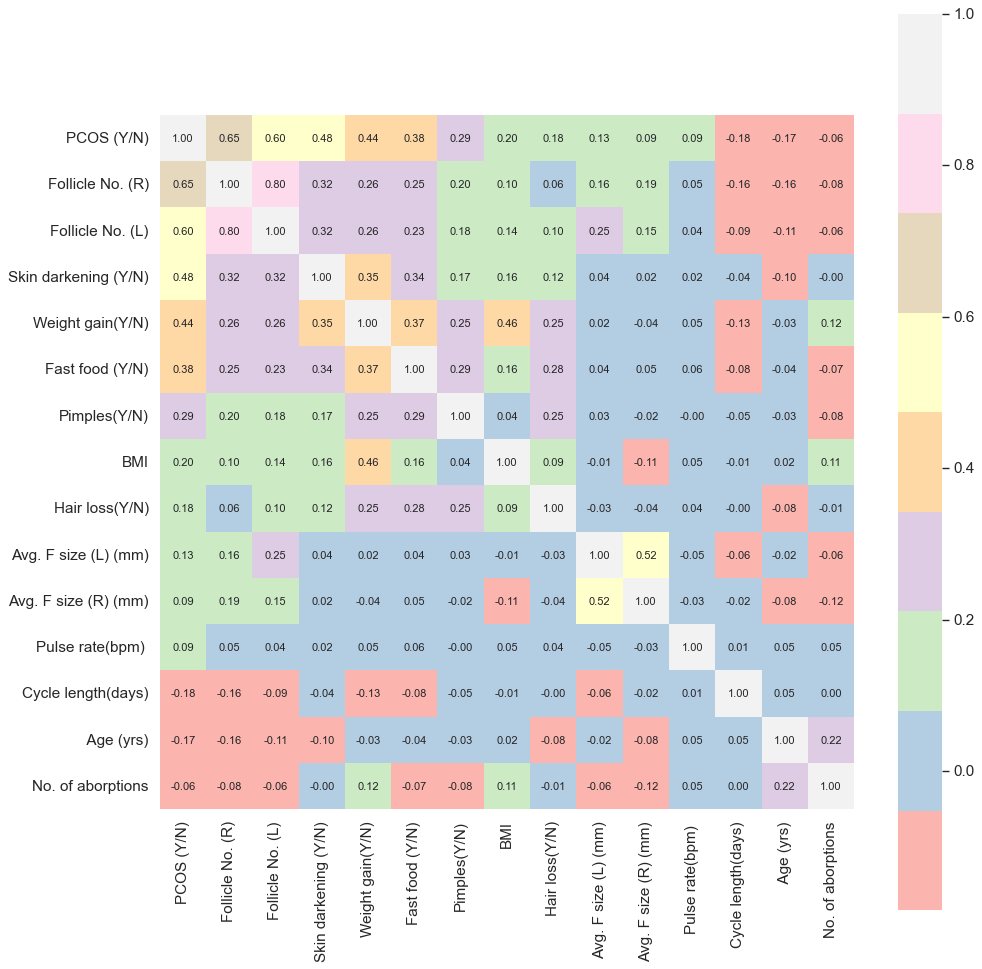

In [59]:
#Heatmap

plt.figure(figsize=(14,14))
k = 12 #number of variables with positive for heatmap
l = 3 #number of variables with negative for heatmap
cols_p = corrmat.nlargest(k, "PCOS (Y/N)")["PCOS (Y/N)"].index 
cols_n = corrmat.nsmallest(l, "PCOS (Y/N)")["PCOS (Y/N)"].index
cols = cols_p.append(cols_n) 

cm = np.corrcoef(pcos[cols].values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True,cmap="Pastel1", annot=True, square=True, fmt='.2f', annot_kws={'size': 10}, yticklabels=cols.values, xticklabels=cols.values)
plt.show()

In [60]:
corrmat["PCOS (Y/N)"].sort_values(ascending=False)

PCOS (Y/N)              1.000000
Follicle No. (R)        0.651032
Follicle No. (L)        0.601445
Skin darkening (Y/N)    0.481768
Weight gain(Y/N)        0.443652
Fast food (Y/N)         0.381772
Pimples(Y/N)            0.288609
BMI                     0.198638
Hair loss(Y/N)          0.177458
Avg. F size (L) (mm)    0.129181
Avg. F size (R) (mm)    0.094268
Pulse rate(bpm)         0.092437
Hb(g/dl)                0.086934
Reg.Exercise(Y/N)       0.069481
Blood Group             0.034244
Waist:Hip Ratio         0.008387
TSH (mIU/L)            -0.009697
Pregnant(Y/N)          -0.026586
No. of aborptions      -0.056741
 Age (yrs)             -0.172436
Cycle length(days)     -0.183781
Name: PCOS (Y/N), dtype: float64

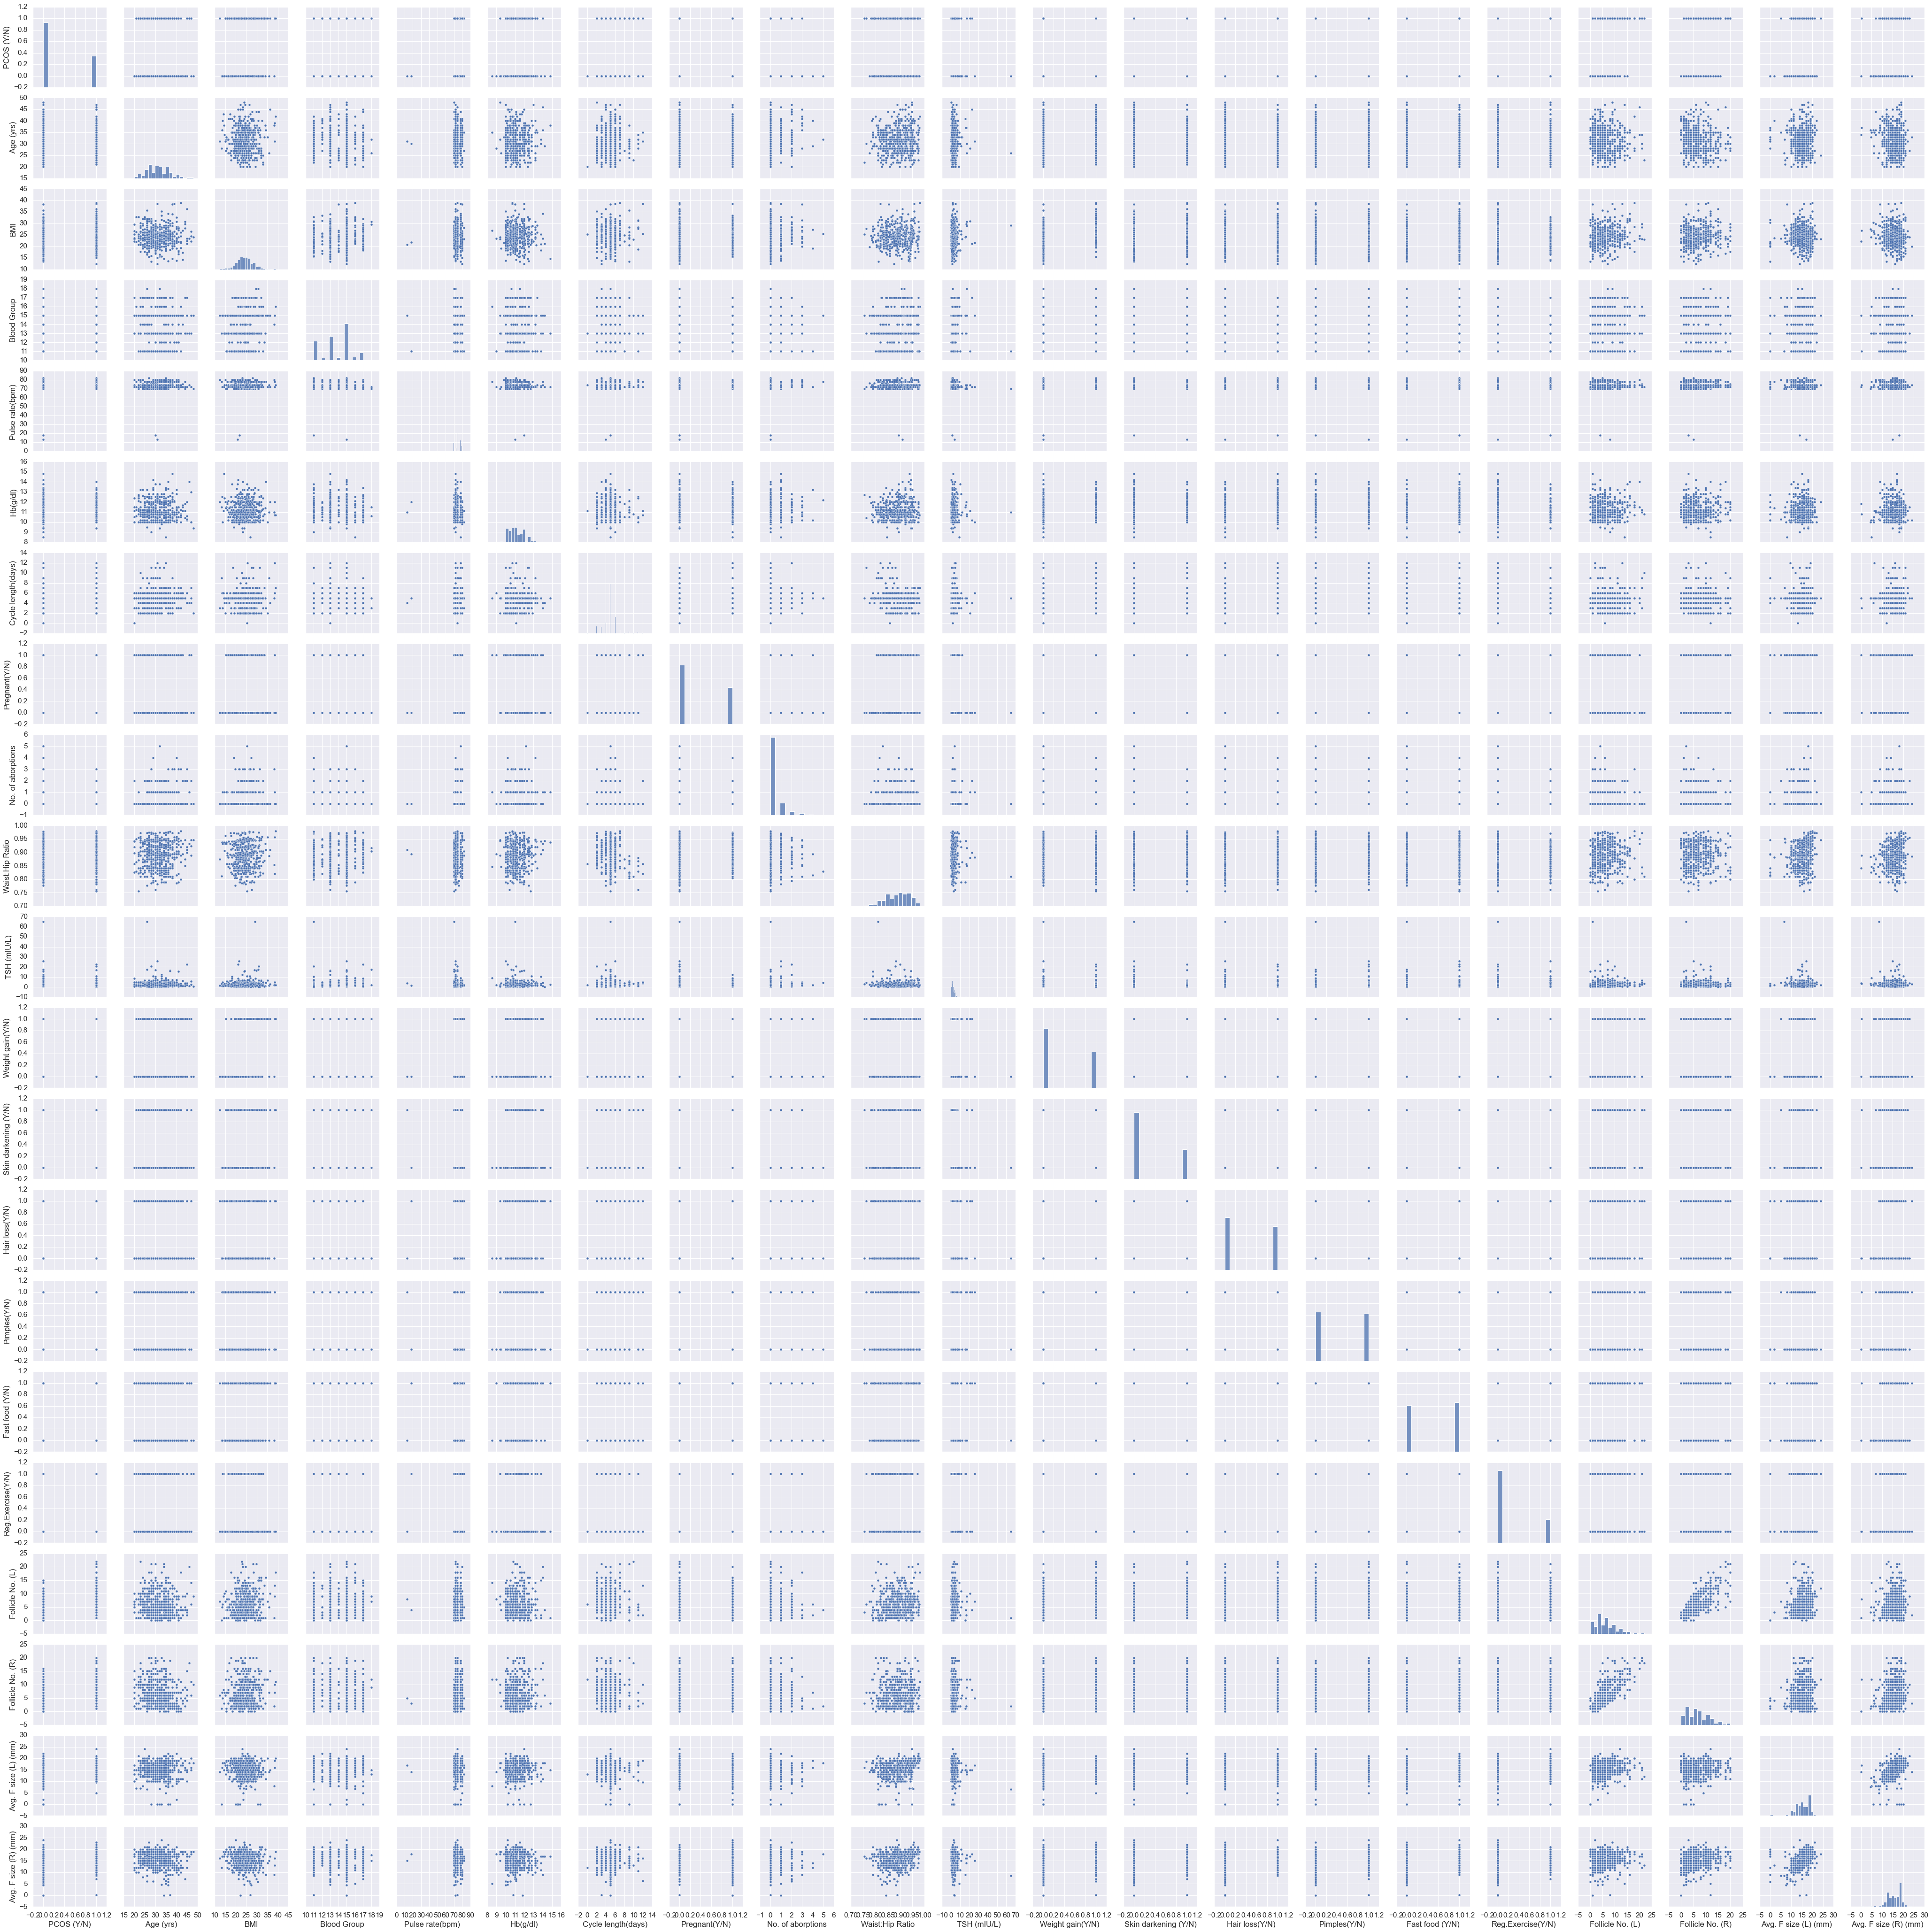

In [61]:
#Pairplot

sns.pairplot(pcos)
plt.show()
plt.close()

In [62]:
pcos.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'Hb(g/dl)', 'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'Weight gain(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')

we chose three visualization techniques to visually present the data;
1.Correlation Plot
    A plot through which we can visually correlate the attributes, from the plot we found that PCOS is more correlated to Follicle, Skin darkening (Y/N), Weight gain(Y/N), Fast food (Y/N), Pimples(Y/N), BMI, Hair loss(Y/N),etc...
2.Heatmap
    A map through which we can visually describe the distribution of relationship between the target and the feature attributes.
3.Pairplot
    A Plot to visualize the distribution of attributes with other attributes. We can also plot the deviation among the attributes.

# 5. Data Wrangling



## 5.1 Univariate Filters 

In [63]:
pcos.columns

Index(['PCOS (Y/N)', ' Age (yrs)', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'Hb(g/dl)', 'Cycle length(days)', 'Pregnant(Y/N)', 'No. of aborptions',
       'Waist:Hip Ratio', 'TSH (mIU/L)', 'Weight gain(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'Follicle No. (L)',
       'Follicle No. (R)', 'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)'],
      dtype='object')

In [64]:
#Chi-Squared
def perform_chi2_test(data, col):
    # Create a contingency table for the column and the target variable
    contingency_table = pd.crosstab(data[col], data['PCOS (Y/N)'])
    
    # Perform the chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    
    # Print the results
    print(f"Column: {col}")
    print(f"Chi-square statistic: {chi2_stat}")
    print(f"P-value: {p_val}")
    print(f"Degrees of freedom: {dof}")
    print(f"Expected frequencies: {expected}")
    print("\n")


In [65]:
#Chit-Squared
for col in pcos.columns:
    perform_chi2_test(pcos, col)

Column: PCOS (Y/N)
Chi-square statistic: 534.4622425996796
P-value: 3.0211435233027245e-118
Degrees of freedom: 1
Expected frequencies: [[244.46938776 118.53061224]
 [118.53061224  57.46938776]]


Column:  Age (yrs)
Chi-square statistic: 50.187955012043965
P-value: 0.006162111795792143
Degrees of freedom: 28
Expected frequencies: [[ 4.04081633  1.95918367]
 [ 2.02040816  0.97959184]
 [ 5.3877551   2.6122449 ]
 [12.12244898  5.87755102]
 [10.10204082  4.89795918]
 [12.12244898  5.87755102]
 [21.55102041 10.44897959]
 [22.89795918 11.10204082]
 [30.30612245 14.69387755]
 [22.89795918 11.10204082]
 [24.91836735 12.08163265]
 [22.2244898  10.7755102 ]
 [29.63265306 14.36734694]
 [16.83673469  8.16326531]
 [19.53061224  9.46938776]
 [24.91836735 12.08163265]
 [21.55102041 10.44897959]
 [10.10204082  4.89795918]
 [13.46938776  6.53061224]
 [ 6.06122449  2.93877551]
 [10.10204082  4.89795918]
 [ 6.06122449  2.93877551]
 [ 4.04081633  1.95918367]
 [ 2.02040816  0.97959184]
 [ 2.02040816  0.979

In [66]:
#Mutual Information(Information Gain)
import pandas as pd
from sklearn.feature_selection import mutual_info_classif
X = pcos.drop(['PCOS (Y/N)'], axis=1)
y = pcos['PCOS (Y/N)']
mi = mutual_info_classif(X, y)
mi_pcos = pd.DataFrame({'feature': X.columns, 'mutual_information': mi})
mi_pcos = mi_pcos.sort_values('mutual_information', ascending=False)
print(mi_pcos)

                 feature  mutual_information
17      Follicle No. (R)            0.250595
16      Follicle No. (L)            0.201081
10      Weight gain(Y/N)            0.110722
11  Skin darkening (Y/N)            0.095700
5     Cycle length(days)            0.083105
14       Fast food (Y/N)            0.042655
15     Reg.Exercise(Y/N)            0.038164
2            Blood Group            0.031001
9            TSH (mIU/L)            0.029815
12        Hair loss(Y/N)            0.020760
4               Hb(g/dl)            0.020542
0              Age (yrs)            0.020202
18  Avg. F size (L) (mm)            0.020201
8        Waist:Hip Ratio            0.019966
13          Pimples(Y/N)            0.016154
1                    BMI            0.014149
3       Pulse rate(bpm)             0.006720
7      No. of aborptions            0.006633
6          Pregnant(Y/N)            0.000000
19  Avg. F size (R) (mm)            0.000000


## 5.2 Report observations

In Chi-Squared "Age" and "Waist:hip Ratio" have p-value less than assumed 0.05 which means null hypothesis is satisfied for these two columns alone.
In Mutual Inforamation Follicle No. (R) have the highest value and more information in feature for predicting the PCOS. Addition to this other factors in descending contributes tot he relationship.

# 6. Implement Machine Learning Techniques

## 6.1 ML technique 1 

In [67]:
#Classification -- Decision Tree classifier
# create model
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.inspection import permutation_importance
x = pcos.drop('PCOS (Y/N)', axis=1)
y = pcos['PCOS (Y/N)']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42)

In [68]:
dtc = DecisionTreeClassifier() 
dtc.fit(x_train, y_train) 
dtc_predicted_train = dtc.predict(x_train) 
dtc_predicted_test = dtc.predict(x_test) 
dtc_train_acc = accuracy_score(y_train, dtc_predicted_train) 
dtc_test_acc = accuracy_score(y_test, dtc_predicted_test) 
dtc_classification_report = classification_report(y_test, dtc_predicted_test)
dtc_confusion_matrix = confusion_matrix(y_test, dtc_predicted_test)

# print accuracy score, classification report, and confusion matrix
print(f"Training phase accuracy: {dtc_train_acc}")
print(f"Test phase accuracy: {dtc_test_acc}")
print(f"Classification Report : \n {dtc_classification_report}")
print(f"Confusion Matrix : \n{dtc_confusion_matrix}\n")

# consfusion matrix cross table
pd.crosstab(y_test, dtc_predicted_test, rownames=['True'], colnames=['Predicted'], margins=True)

Training phase accuracy: 1.0
Test phase accuracy: 0.8333333333333334
Classification Report : 
               precision    recall  f1-score   support

           0       0.91      0.86      0.88        80
           1       0.66      0.75      0.70        28

    accuracy                           0.83       108
   macro avg       0.78      0.81      0.79       108
weighted avg       0.84      0.83      0.84       108

Confusion Matrix : 
[[69 11]
 [ 7 21]]



Predicted,0,1,All
True,,,
0,69,11,80
1,7,21,28
All,76,32,108


## 6.2 ML technique 2 

In [69]:
#K-NN
knnc = KNeighborsClassifier() 
knnc.fit(x_train, y_train) 
knnc_predicted_train = knnc.predict(x_train) 
knnc_predicted_test = knnc.predict(x_test) 
knnc_train_acc = accuracy_score(y_train, knnc_predicted_train) 
knnc_test_acc = accuracy_score(y_test, knnc_predicted_test) 
knnc_classification_report = classification_report(y_test, knnc_predicted_test)
knnc_confusion_matrix = confusion_matrix(y_test, knnc_predicted_test)

# print accuracy score, classification report, and confusion matrix
print(f"Training phase accuracy: {knnc_train_acc}")
print(f"Test phase accuracy: {knnc_test_acc}")
print(f"Classification Report : \n {knnc_classification_report}")
print(f"Confusion Matrix : \n{knnc_confusion_matrix}\n")

# consfusion matrix cross table
pd.crosstab(y_test, knnc_predicted_test, rownames=['True'], colnames=['Predicted'], margins=True)

Training phase accuracy: 0.8955916473317865
Test phase accuracy: 0.8240740740740741
Classification Report : 
               precision    recall  f1-score   support

           0       0.86      0.91      0.88        80
           1       0.70      0.57      0.63        28

    accuracy                           0.82       108
   macro avg       0.78      0.74      0.76       108
weighted avg       0.82      0.82      0.82       108

Confusion Matrix : 
[[73  7]
 [12 16]]



C:\Users\purus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
C:\Users\purus\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdim

Predicted,0,1,All
True,,,
0,73,7,80
1,12,16,28
All,85,23,108


## 7. Conclusion 

#ML1 Decision tree result explained
The decision tree model has been trained and tested on a dataset. The results obtained are as follows:

Training phase accuracy: 1.0 - This means that the decision tree algorithm was able to correctly classify all the instances in the training dataset. However, a perfect accuracy on the training dataset does not necessarily guarantee a good performance on unseen data.

Test phase accuracy: 0.7962962962962963 - This means that the decision tree model was able to correctly classify 79.63% of the instances in the test dataset. The test phase accuracy is a better measure of the performance of the model on unseen data.

Classification Report: The classification report shows various metrics such as precision, recall, and F1 score for each class (0 and 1) in the dataset. The precision for class 0 is 0.88, which means that when the model predicts a sample as class 0, it is correct 88% of the time. The recall for class 0 is 0.84, which means that the model is able to correctly identify 84% of the instances of class 0 in the dataset. The F1-score for class 0 is 0.86, which is the harmonic mean of precision and recall. Similarly, the precision, recall, and F1-score for class 1 are 0.59, 0.68, and 0.63, respectively.

Confusion Matrix: The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives predicted by the model. In this case, the confusion matrix shows that out of the 80 instances of class 0, the model correctly predicted 67 as class 0 and 13 as class 1. Out of the 28 instances of class 1, the model correctly predicted 19 as class 1 and 9 as class 0.

In summary, the decision tree model achieved a reasonable performance on the test dataset with an accuracy of 79.63%. However, the precision, recall, and F1-score for class 1 are relatively low compared to class 0, indicating that the model is not as good at identifying instances of class 1 as it is for class 0. The confusion matrix provides more detailed information about the performance of the model on each class.

#ML2 KNN results explained.

The KNN model has been trained and tested on a dataset. The results obtained are as follows:

Training phase accuracy: 0.8955916473317865 - This means that the KNN algorithm was able to correctly classify 89.56% of the instances in the training dataset.

Test phase accuracy: 0.8240740740740741 - This means that the KNN model was able to correctly classify 82.41% of the instances in the test dataset.

Classification Report: The classification report shows various metrics such as precision, recall, and F1 score for each class (0 and 1) in the dataset. The precision for class 0 is 0.86, which means that when the model predicts a sample as class 0, it is correct 86% of the time. The recall for class 0 is 0.91, which means that the model is able to correctly identify 91% of the instances of class 0 in the dataset. The F1-score for class 0 is 0.88, which is the harmonic mean of precision and recall. Similarly, the precision, recall, and F1-score for class 1 are 0.70, 0.57, and 0.63, respectively.

Confusion Matrix: The confusion matrix shows the number of true positives, true negatives, false positives, and false negatives predicted by the model. In this case, the confusion matrix shows that out of the 80 instances of class 0, the model correctly predicted 73 as class 0 and 7 as class 1. Out of the 28 instances of class 1, the model correctly predicted 16 as class 1 and 12 as class 0.

In summary, the KNN model achieved a reasonable performance on the test dataset with an accuracy of 82.41%. The precision, recall, and F1-score for class 1 are relatively lower compared to class 0, indicating that the model is not as good at identifying instances of class 1 as it is for class 0. The confusion matrix provides more detailed information about the performance of the model on each class.

## 8. Solution